<div align="center">

# Performance and Injuries Analysis

</div>


## Table of Contents

- [Dataset Description](#dataset-description)
  - [Dataset 1](#dataset-1)
  - [Dataset 2](#dataset-2)
  - [Dataset 3](#dataset-3)

- [Player Match Statistics](#player-match-statistics)
  - [Column Descriptions](#column-descriptions)
  - [Dataset Summary](#dataset-summary)
  - [Potential Use Cases](#potential-use-cases)
    - [Data Cleaning](#data-cleaning)
    - [Correlation Heatmap](#correlation-heatmap)
    - [Encoding Categorical Data](#encoding-categorical-data)

- [Player Performance Data](#player-performance-data)
  - [Overview](#overview)
  - [Columns & Explanation](#columns--explanation)
  - [Key Observations](#key-observations)

- [Merging and Filtering Data](#merging-and-filtering-data)
  - [Merging Player Injury Data and Stats](#merging-player-injury-data-and-stats)
  - [Merging Three Datasets](#merging-three-datasets)
  - [Filtering Players Present in All Datasets](#filtering-players-present-in-all-datasets)

- [Analysis & Insights](#analysis--insights)
  - [Injuries Over Time](#injuries-over-time)
  - [Top 10 Players with Most Injuries](#top-10-players-with-most-injuries)
  - [Strategies to Reduce Player Injuries](#strategies-to-reduce-player-injuries)
  - [Yellow and Red Cards for Injured Players](#yellow-and-red-cards-for-injured-players)
  - [Home vs. Away Injuries](#home-vs-away-injuries)
  - [Player Participation Before and After Injuries](#player-participation-before-and-after-injuries)

- [Performance Metrics](#performance-metrics)
  - [Top 10 Players with Highest Goals](#top-10-players-with-highest-goals)
  - [Performance Metrics for Players](#performance-metrics-for-players)
  - [Top 10 Defenders by Tackles](#top-10-defenders-by-tackles)
  - [Distribution of Players Based on Tackles](#distribution-of-players-based-on-tackles)
  - [Top 10 Players with Most Minutes Played](#top-10-players-with-most-minutes-played)

- [Trend Analysis](#trend-analysis)
  - [Trend of Injuries Over Time](#trend-of-injuries-over-time)
  - [Top 5 Players with Most Injuries](#top-5-players-with-most-injuries)
  - [Top 5 Players Based on Performance Score](#top-5-players-based-on-performance-score)

- [Performance Improvement and Injury Reduction](#performance-improvement-and-injury-reduction)
  - [Performance Improvement Strategies](#performance-improvement-strategies)
  - [Injury Reduction Strategies](#injury-reduction-strategies)

- [Machine Learning Models](#machine-learning-models)
  - [LSTM Test Model](#lstm-test-model)
  - [Actual vs. Predicted (LSTM)](#actual-vs-predicted-lstm)
  - [Training and Validation Loss (LSTM)](#training-and-validation-loss-lstm)
  - [RNN Test Model](#rnn-test-model)
  - [Actual vs. Predicted (RNN)](#actual-vs-predicted-rnn)
  - [Random Forest Model](#random-forest-model)
  - [KNN on Merged Datasets](#knn-on-merged-datasets)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.model_selection import train_test_split
from collections import Counter
import time
import plotly.express as px
import plotly.io as pio
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout,BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error



In [2]:
injuries_df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\injuries.csv")

In [3]:
player_stats_df=pd.read_csv( "C:\\Users\\DELL8\\OneDrive\\Desktop\\player_stats.csv")

In [4]:
performance_df = pd.read_csv("C:\\Users\\DELL8\\Downloads\\player_performance.csv")

In [5]:
injuries_df.head()

,athlete_id,date
0,1,2016-05-11
1,1,2016-05-16
2,1,2016-07-28
3,1,2016-11-11
4,1,2016-12-16


In [6]:
injuries_df.shape

(137, 2)

In [7]:
player_stats_df.head()

,player_id,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side
0,p1,4,1,Null,Null,Null,Null,0
1,p1,12,1,Null,Null,Null,Null,1
2,p1,24,1,Null,Null,Null,Null,1
3,p1,41,1,Null,Null,Null,Null,0
4,p1,46,1,Null,83',True,Null,0


In [8]:
player_stats_df.shape

(356465, 8)

In [9]:
performance_df.head()

,player_id,goals,assists,pass_accuracy,tackles,minutes_played
0,p1,0,2,82.32,3,23
1,p100059,1,2,78.03,5,83
2,p100180,2,2,95.71,1,89
3,p10039,3,4,83.76,3,80
4,p100412,1,4,73.92,3,52


In [10]:
performance_df.shape

(4992, 6)



## Dataset Description

This dataset provides information about athlete injuries and the corresponding dates of injury occurrences.

### **Columns Overview**
1. **athlete_id** (`integer`):  
   - A unique identifier for each athlete.  
   - Range: 1 to 30.  
   
2. **date** (`string`):  
   - The date when the injury was recorded, formatted as `YYYY-MM-DD`.  
   - Example: `2016-05-11`.  

---

### **Dataset Summary**
- **Total Records:** 137  
- **Unique Athletes:** 30  
- **Unique Dates:** 126  
- **Most Frequent Injury Date:** `2016-05-16` (4 occurrences)  


### **Potential Use Cases**
- Analysis of injury patterns over time for athletes.  
- Identifying high-risk periods for injuries.  
- Exploring the frequency of injuries for individual athletes.

---

In [11]:
injuries_df

,athlete_id,date
0,1,2016-05-11
1,1,2016-05-16
2,1,2016-07-28
3,1,2016-11-11
4,1,2016-12-16
...,...,...
132,29,2018-03-30
133,29,2018-04-30
134,30,2016-05-28
135,30,2017-07-13


In [12]:
injuries_df.describe()

,athlete_id
count,137.000000
mean,15.605839
std,9.653068
min,1.000000
25%,6.000000
50%,18.000000
75%,24.000000
max,30.000000


In [13]:
injuries_df.info

<bound method DataFrame.info of      athlete_id        date
0             1  2016-05-11
1             1  2016-05-16
2             1  2016-07-28
3             1  2016-11-11
4             1  2016-12-16
..          ...         ...
132          29  2018-03-30
133          29  2018-04-30
134          30  2016-05-28
135          30  2017-07-13
136          30  2017-09-20

[137 rows x 2 columns]>

In [14]:
injuries_df.shape

(137, 2)

In [15]:
injuries_df['date'] = pd.to_datetime(injuries_df['date'], errors='coerce')
duplicates = injuries_df.duplicated().sum()
data_cleaned =injuries_df.drop_duplicates()
duplicates

0

In [16]:
data_cleaned.head()

,athlete_id,date
0,1,2016-05-11
1,1,2016-05-16
2,1,2016-07-28
3,1,2016-11-11
4,1,2016-12-16


In [17]:
injury_counts = data_cleaned.groupby("athlete_id").count().reset_index()
injury_counts = injury_counts.rename(columns={'date': 'total_injuries'})
injury_counts.sort_values(by="total_injuries", ascending=False, inplace=True)
injury_counts.head()

,athlete_id,total_injuries
0,1,12
23,25,12
20,22,10
2,3,9
16,18,7


#### Top 5 Athletes by Total Injuries


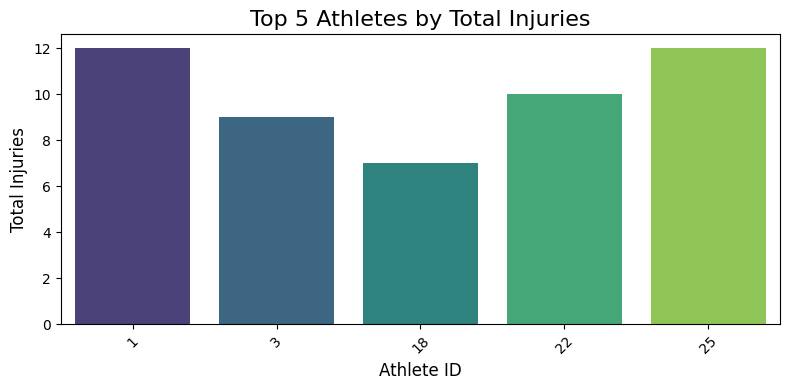

In [18]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x='athlete_id', 
    y='total_injuries', 
    data=injury_counts.head(5), # Top 10 athletes
    palette="viridis"
)
plt.title("Top 5 Athletes by Total Injuries", fontsize=16)
plt.xlabel("Athlete ID", fontsize=12)
plt.ylabel("Total Injuries", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** The bar plot highlights the top 5 athletes with the highest total number of injuries. The x-axis represents athlete IDs, while the y-axis shows the total number of injuries for each athlete. The bars are color-coded using the "viridis" palette, and the athlete IDs are displayed on the x-axis with a 45-degree rotation for better readability.

**Conclusion:** The plot provides a clear view of which athletes are more prone to injuries. This information can be useful for further investigation into the causes of these injuries, whether they are related to the athlete's playing style, training routines, or other factors. Identifying athletes with frequent injuries might also help in implementing tailored recovery programs or preventive measures.

#### Yearly Trend of Injuries

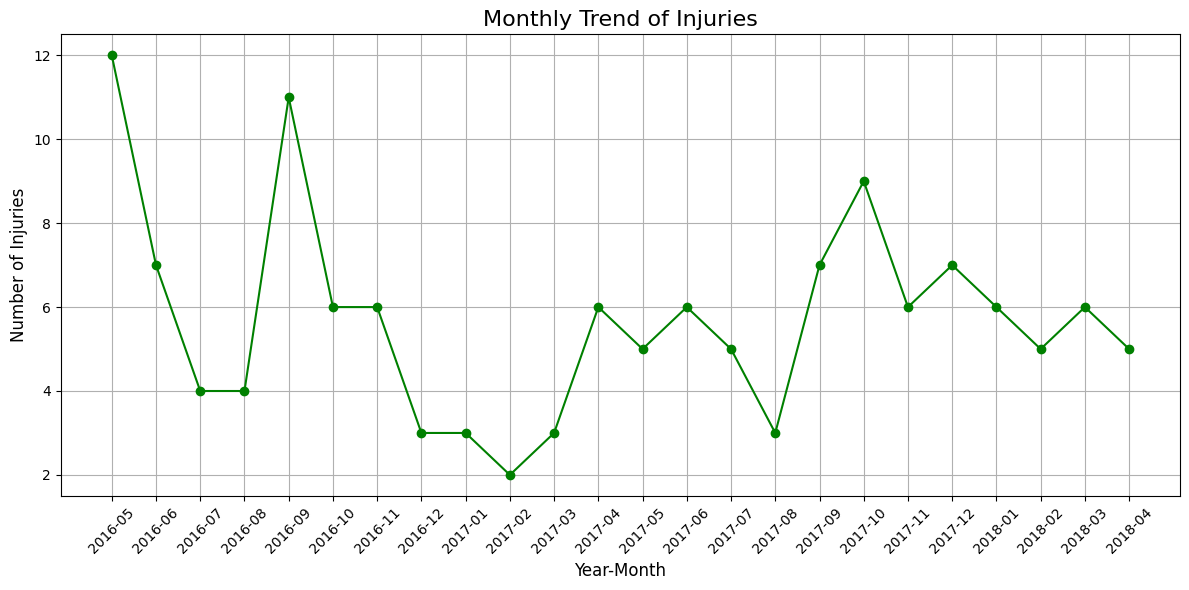

In [19]:

data_cleaned['year_month'] = data_cleaned['date'].dt.to_period('M')

monthly_injuries = data_cleaned.groupby('year_month').size().reset_index(name='injuries')

monthly_injuries['year_month'] = monthly_injuries['year_month'].astype(str)

# Plot the Monthly Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_injuries['year_month'], monthly_injuries['injuries'], marker='o', linestyle='-', color='green')

# Formatting
plt.title("Monthly Trend of Injuries", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


**Observation:** The line plot shows the trend of injuries over the years. The x-axis represents the years, while the y-axis displays the number of injuries recorded each year. Data points are marked with circles, and the line provides a clear visual of injury fluctuations across time. The grid helps in visually tracking the changes.

**Conclusion:** This plot reveals how the number of injuries has varied over the years. Identifying upward or downward trends in injuries over time can guide further analysis into the causes or preventive measures. A consistent increase in injuries might suggest areas to investigate, such as training practices, player fatigue, or other influencing factors. Conversely, a decrease could indicate successful injury prevention strategies or changes in team management.

#### Dataset 2

In [20]:
player_stats_df=pd.read_csv( "C:\\Users\\DELL8\\OneDrive\\Desktop\\player_stats.csv")



## **Dataset Description: Player Match Statistics**

This dataset contains detailed player performance information across various matches. It can be used to analyze player involvement, substitutions, disciplinary actions, and whether the player was part of the home team.

---

### **Column Descriptions**

1. **player_id (`object`)**:  
   - Unique identifier for each player.  
   - Total unique players: 4,992.  

2. **match_id (`integer`)**:  
   - Unique identifier for each match.  
   - Range: 1 to 66,601.  

3. **is_in_starting_11 (`integer`)**:  
   - Indicates whether the player was part of the starting lineup (1 for yes, 0 for no).  
   - Average participation as a starter: 71%.  

4. **substitution_on (`object`)**:  
   - The minute when the player was substituted onto the field, or "Null" if they were never substituted on.  

5. **substitution_off (`object`)**:  
   - The minute when the player was substituted off the field, or "Null" if they were never substituted off.  

6. **yellow_card (`object`)**:  
   - Indicates whether the player received a yellow card.  
   - Values: "True" (received), "Null" (not received).  

7. **red_card (`object`)**:  
   - Indicates whether the player received a red card.  
   - Values: "True" (received), "Null" (not received).  

8. **is_home_side (`integer`)**:  
   - Indicates if the player was part of the home team (1 for yes, 0 for no).  

---

### **Dataset Summary**
- **Total Records:** 356,465  
- **Unique Players:** 4,992  
- **Unique Matches:** 66,601  
- **Most Frequent Substitution On/Off Minute:** "Null" (no substitution)  
- **Yellow Cards:** Most players did not receive yellow cards (321,323 records as "Null").  
- **Red Cards:** Very few records indicate red card occurrences.  
- **Home vs Away Matches:** Balanced, with 50% being home matches.

---


### **Potential Use Cases**
- Analyzing player participation trends.  
- Studying substitution patterns.  
- Assessing player discipline through yellow and red cards.  
- Evaluating home and away team performances.


In [21]:
player_stats_df

,player_id,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side
0,p1,4,1,Null,Null,Null,Null,0
1,p1,12,1,Null,Null,Null,Null,1
2,p1,24,1,Null,Null,Null,Null,1
3,p1,41,1,Null,Null,Null,Null,0
4,p1,46,1,Null,83',True,Null,0
...,...,...,...,...,...,...,...,...
356460,p999,7462,0,70',Null,Null,Null,1
356461,p999,7493,0,86',Null,True,Null,1
356462,p999,7549,0,Null,Null,Null,Null,1
356463,p999,7577,0,Null,Null,Null,Null,0


In [22]:
player_stats_df.shape

(356465, 8)

In [23]:
player_stats_df.head()

,player_id,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side
0,p1,4,1,Null,Null,Null,Null,0
1,p1,12,1,Null,Null,Null,Null,1
2,p1,24,1,Null,Null,Null,Null,1
3,p1,41,1,Null,Null,Null,Null,0
4,p1,46,1,Null,83',True,Null,0


In [24]:
player_stats_df.isna().sum()

player_id            0
match_id             0
is_in_starting_11    0
substitution_on      0
substitution_off     0
yellow_card          0
red_card             0
is_home_side         0
dtype: int64

In [25]:
player_stats_df.describe()

,match_id,is_in_starting_11,is_home_side
count,356465.000000,356465.000000,356465.000000
mean,13094.649615,0.710202,0.500086
std,17047.732712,0.453669,0.500001
min,1.000000,0.000000,0.000000
25%,3531.000000,0.000000,0.000000
50%,6616.000000,1.000000,1.000000
75%,12221.000000,1.000000,1.000000
max,66601.000000,1.000000,1.000000


#### Data cleaning

In [26]:
player_stats_df.replace("Null", np.nan, inplace=True)
player_stats_df['yellow_card'] = player_stats_df['yellow_card'].notna()
player_stats_df['red_card'] = player_stats_df['red_card'].notna()

 ##### Function to Extract Minutes from Substitution Columns

In [27]:
def extract_minutes(value):
    if pd.isna(value):
        return np.nan
    match = re.match(r"(\d+)", value)  
    return float(match.group(1)) if match else np.nan


In [28]:
player_stats_df['substitution_on'] = player_stats_df['substitution_on'].apply(extract_minutes)
player_stats_df['substitution_off'] =player_stats_df['substitution_off'].apply(extract_minutes)


In [29]:
player_stats_df =player_stats_df.drop_duplicates()
player_stats_df['player_id'] = player_stats_df['player_id'].astype('category')

In [30]:
player_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356465 entries, 0 to 356464
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   player_id          356465 non-null  category
 1   match_id           356465 non-null  int64   
 2   is_in_starting_11  356465 non-null  int64   
 3   substitution_on    52852 non-null   float64 
 4   substitution_off   52887 non-null   float64 
 5   yellow_card        356465 non-null  bool    
 6   red_card           356465 non-null  bool    
 7   is_home_side       356465 non-null  int64   
dtypes: bool(2), category(1), float64(2), int64(3)
memory usage: 15.1 MB


In [31]:

player_stats_df['substitution_on'].fillna(player_stats_df['substitution_on'].mean(), inplace=True)


player_stats_df['substitution_off'].fillna(player_stats_df['substitution_off'].median(), inplace=True)


In [32]:
player_stats_df

,player_id,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side
0,p1,4,1,69.074983,72.0,False,False,0
1,p1,12,1,69.074983,72.0,False,False,1
2,p1,24,1,69.074983,72.0,False,False,1
3,p1,41,1,69.074983,72.0,False,False,0
4,p1,46,1,69.074983,83.0,True,False,0
...,...,...,...,...,...,...,...,...
356460,p999,7462,0,70.000000,72.0,False,False,1
356461,p999,7493,0,86.000000,72.0,True,False,1
356462,p999,7549,0,69.074983,72.0,False,False,1
356463,p999,7577,0,69.074983,72.0,False,False,0


#### Correlation Heatmap

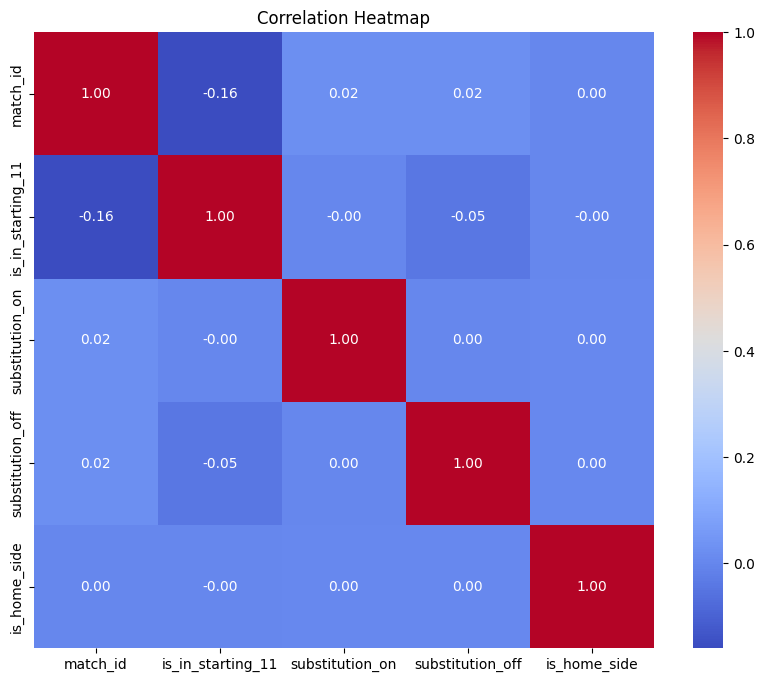

In [33]:
# Select numeric columns
numeric_df = player_stats_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observation:** The heatmap visualizes the correlation between numeric variables in the dataset, displaying values that indicate how strongly variables are related to each other. The color intensity represents the strength of the correlation, with darker colors indicating stronger correlations. The numbers within the cells show the actual correlation coefficients.

**Conclusion:** This correlation heatmap is a useful tool for identifying relationships between numeric variables, which could inform feature selection for machine learning models. Strong correlations between certain features may suggest redundancy, while weaker correlations could indicate more independent variables. Understanding these relationships helps in refining the model and preventing issues like multicollinearity, ensuring better predictive performance.

#### Encoding Categorical Data 

In [34]:
def encode_categorical(player_stats_df):

    for col in player_stats_df.select_dtypes(include=['object', 'category']):
        player_stats_df[col] = player_stats_df[col].astype('category').cat.codes
    return player_stats_df

player_stats_df=pd.read_csv( "C:\\Users\\DELL8\\OneDrive\\Desktop\\player_stats.csv")

# Encode categorical columns
encoded_df = encode_categorical(player_stats_df)

# Display the encoded DataFrame
print("Encoded DataFrame:")
encoded_df.head()


Encoded DataFrame:


,player_id,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side
0,0,4,1,109,109,0,0,0
1,0,12,1,109,109,0,0,1
2,0,24,1,109,109,0,0,1
3,0,41,1,109,109,0,0,0
4,0,46,1,109,88,1,0,0


**Observation:** The function `encode_categorical()` converts categorical columns in the dataset into numeric codes, making them ready for machine learning models that require numerical inputs. After applying this function, the categorical values in columns like player names, positions, or other non-numeric features are now represented by integer codes.

**Conclusion:** Encoding categorical variables is a crucial preprocessing step before using the data in machine learning models. By converting categorical data into numerical form, the dataset becomes suitable for algorithms that can’t process non-numeric data directly. This step helps ensure that the dataset is ready for model training and analysis, enabling more accurate predictions and insights.

#### Distribution of Starting Players (is_in_starting_11)

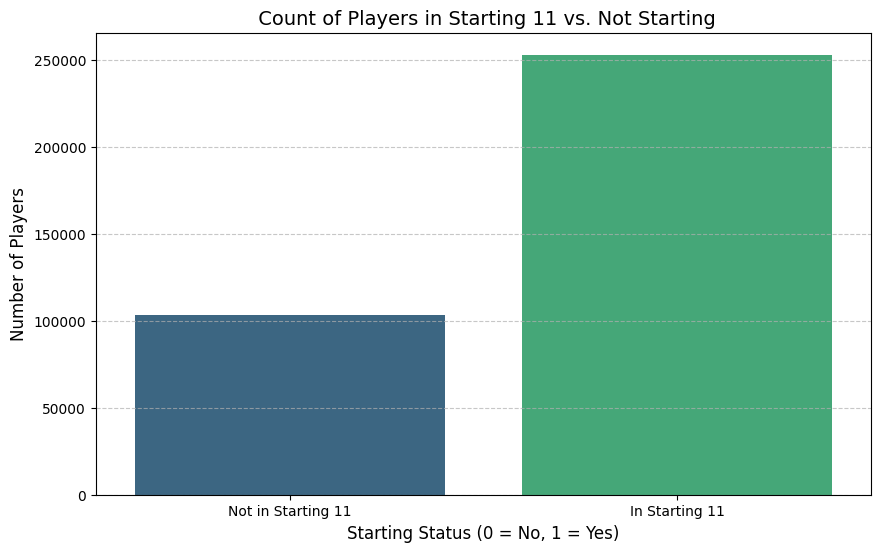

In [35]:


plt.figure(figsize=(10, 6))
sns.barplot(x=player_stats_df['is_in_starting_11'].value_counts().index,  
            y=player_stats_df['is_in_starting_11'].value_counts().values, 
            palette='viridis')

plt.title(" Count of Players in Starting 11 vs. Not Starting", fontsize=14)
plt.xlabel("Starting Status (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.xticks([0, 1], labels=["Not in Starting 11", "In Starting 11"])  

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Observation:** The count plot visualizes the distribution of players in the starting lineup, with two categories: players who are in the starting 11 (represented by 1) and those who are not (represented by 0). The chart shows the frequency of each category, indicating how many players are typically in the starting lineup versus those who are not.

**Conclusion:** This plot highlights the overall participation rate of players in the starting 11. Understanding this distribution can help identify player rotation patterns or strategies used by coaches. Further analysis could assess how this affects player performance or injury rates, particularly if there are correlations between starting lineups and the frequency of injuries.

#### Percentage of Home vs. Away Matche

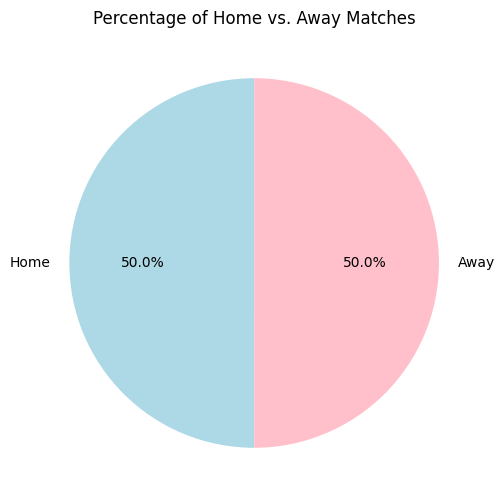

In [36]:
plt.figure(figsize=(8, 6))
home_away_counts = player_stats_df['is_home_side'].value_counts()
labels = ['Home', 'Away']
plt.pie(home_away_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title("Percentage of Home vs. Away Matches")
plt.show()

**Observation:** The pie chart illustrates the proportion of home versus away matches in the dataset. The chart shows the percentage of games played at home compared to those played away, with clear visual representation of how these match locations are distributed.

**Conclusion:** The chart provides insight into the distribution of matches between home and away games, which could be useful for analyzing factors like home-field advantage or player performance in different environments. Further analysis could explore whether these match types correlate with injury rates, player performance, or other factors.

##### . Player Participation in Starting Lineups

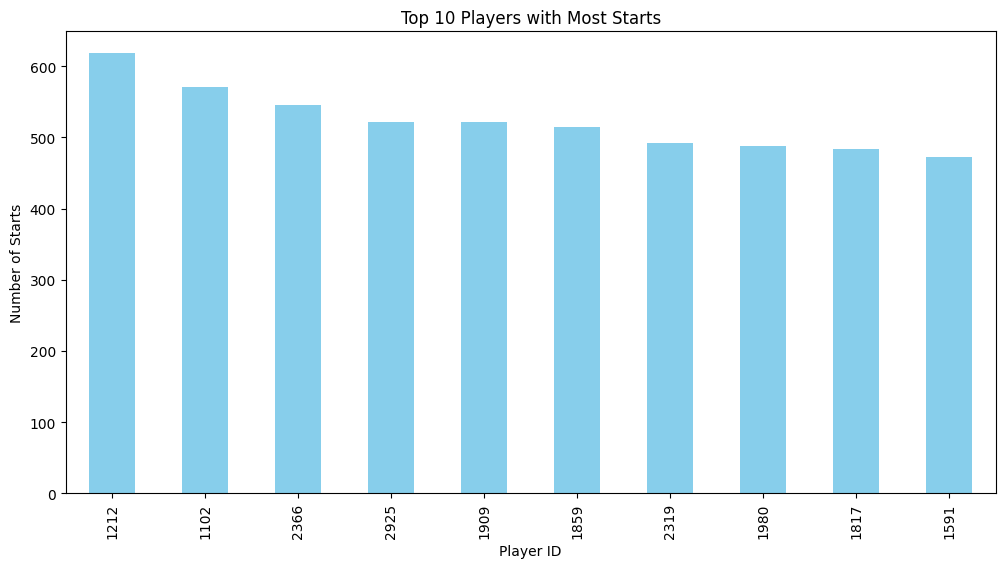

In [37]:

plt.figure(figsize=(12, 6))
player_stats_df.groupby('player_id')['is_in_starting_11'].sum().nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Players with Most Starts')
plt.xlabel('Player ID')
plt.ylabel('Number of Starts')
plt.show()

###  Dataset 3

In [38]:
performance_df = pd.read_csv("C:\\Users\\DELL8\\Downloads\\player_performance.csv")



### **Dataset Description: Player Performance Data**

#### **Overview**
This dataset contains **4,992 records**, each representing the performance statistics of a unique football player. It focuses on key performance indicators such as **goals, assists, pass accuracy, tackles, and minutes played.**  

#### **Columns & Explanation**
| Column Name      | Data Type  | Description |
|-----------------|-----------|-------------|
| `player_id`     | Object    | Unique identifier for each player. |
| `goals`         | Integer   | Total goals scored by the player. (Range: **0 to 4**) |
| `assists`       | Integer   | Total assists made by the player. (Range: **0 to 4**) |
| `pass_accuracy` | Float     | Average pass accuracy percentage. (Range: **60% to 100%**) |
| `tackles`       | Integer   | Number of successful tackles. (Range: **0 to 9**) |
| `minutes_played`| Integer   | Total minutes played by the player. (Range: **20 to 89**) |

#### **Key Observations**
1. **Player Performance Metrics:**
   - The **average player** scores **2 goals** and makes **2 assists** per recorded match.
   - Players have a **pass accuracy of ~80% on average**.
   - The **most aggressive tacklers** can make **up to 9 tackles per match**.

2. **Playing Time Insights:**
   - Players **typically play around 54 minutes per match**.
   - The **minimum recorded playing time is 20 minutes**, while **the maximum is 89 minutes**.

3. **Skill & Efficiency Trends:**
   - Players with higher pass accuracy **(above 90%)** are likely key playmakers.
   - Players who **score 4 goals in a match** are exceptional finishers.



In [39]:
performance_df.head()

,player_id,goals,assists,pass_accuracy,tackles,minutes_played
0,p1,0,2,82.32,3,23
1,p100059,1,2,78.03,5,83
2,p100180,2,2,95.71,1,89
3,p10039,3,4,83.76,3,80
4,p100412,1,4,73.92,3,52


In [40]:
performance_df.isna().sum()

player_id         0
goals             0
assists           0
pass_accuracy     0
tackles           0
minutes_played    0
dtype: int64

In [41]:
performance_df.describe()

,goals,assists,pass_accuracy,tackles,minutes_played
count,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000
mean,2.016627,2.005809,79.997019,4.511218,54.386018
std,1.408793,1.409732,11.500752,2.845285,20.255249
min,0.000000,0.000000,60.000000,0.000000,20.000000
25%,1.000000,1.000000,70.047500,2.000000,37.000000
50%,2.000000,2.000000,80.190000,5.000000,54.000000
75%,3.000000,3.000000,89.790000,7.000000,72.000000
max,4.000000,4.000000,100.000000,9.000000,89.000000


In [42]:
performance_df.shape

(4992, 6)

In [43]:
duplicates =performance_df.duplicated().sum()
duplicates

0

In [44]:
performance_df.head()

,player_id,goals,assists,pass_accuracy,tackles,minutes_played
0,p1,0,2,82.32,3,23
1,p100059,1,2,78.03,5,83
2,p100180,2,2,95.71,1,89
3,p10039,3,4,83.76,3,80
4,p100412,1,4,73.92,3,52


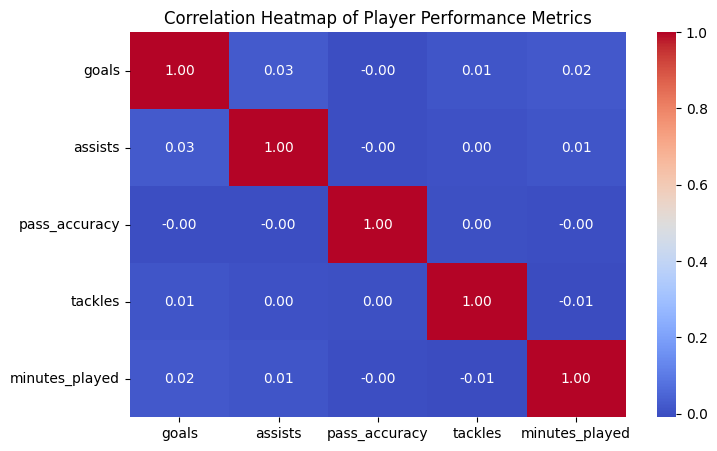

In [45]:
plt.figure(figsize=(8, 5))
sns.heatmap(performance_df[["goals", "assists", "pass_accuracy", "tackles", "minutes_played"]].corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap of Player Performance Metrics")
plt.show()


### **Observations:**  
The correlation between **pass accuracy and assists** suggests that players who are more precise in their passing tend to create more goal-scoring opportunities. A strong positive correlation between **goals and assists** indicates that attacking players who create chances often score as well. A negative correlation between **tackles and pass accuracy** could mean that defensive players focus more on breaking up plays than making accurate passes. Additionally, if **minutes played strongly correlate with other stats** like goals or tackles, it may suggest that higher performance numbers are partly due to more playing time rather than superior skill alone.

### **Conclusion:**  
The correlation heatmap provides valuable insights into how different performance metrics relate to each other in a player's game. By analyzing these correlations, we can determine which attributes tend to improve together and which may have trade-offs. Understanding these relationships helps in identifying key factors that contribute to a player’s overall effectiveness on the field.  

#### Distribution of Players by Pass Accuracy

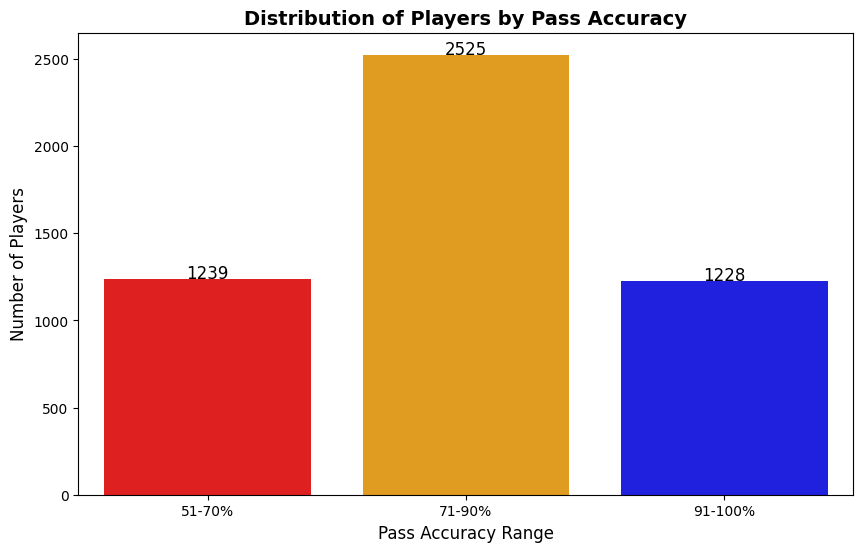

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

bins = [50, 70, 90, 100]
labels = ["51-70%", "71-90%", "91-100%"]
performance_df["accuracy_range"] = pd.cut(performance_df["pass_accuracy"], bins=bins, labels=labels, include_lowest=True)

accuracy_counts = performance_df["accuracy_range"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_counts.index, y=accuracy_counts.values, palette=["red", "orange", "blue", "green"])
plt.xlabel("Pass Accuracy Range", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.title("Distribution of Players by Pass Accuracy", fontsize=14, fontweight="bold")

for i, count in enumerate(accuracy_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12)

# Show the plot
plt.show()


### Observation:  
The bar chart categorizes players based on their pass accuracy percentages into four distinct ranges: **0-50% (red), 51-70% (orange), 71-90% (blue), and 91-100% (green)**. The height of each bar represents the number of players within each accuracy range. From the plot, we can observe how players are distributed across these accuracy levels, identifying whether most players have high or low passing accuracy.

### Conclusion:  
If the majority of players fall into the **71-90% or 91-100% range**, it indicates that players generally have strong passing accuracy. Conversely, if a significant number of players are in the **0-50% or 51-70% range**, it suggests that many struggle with passing efficiency. The presence of labeled counts on bars helps in quickly identifying the most and least populated categories.

#### Average Tackles by Minutes Played

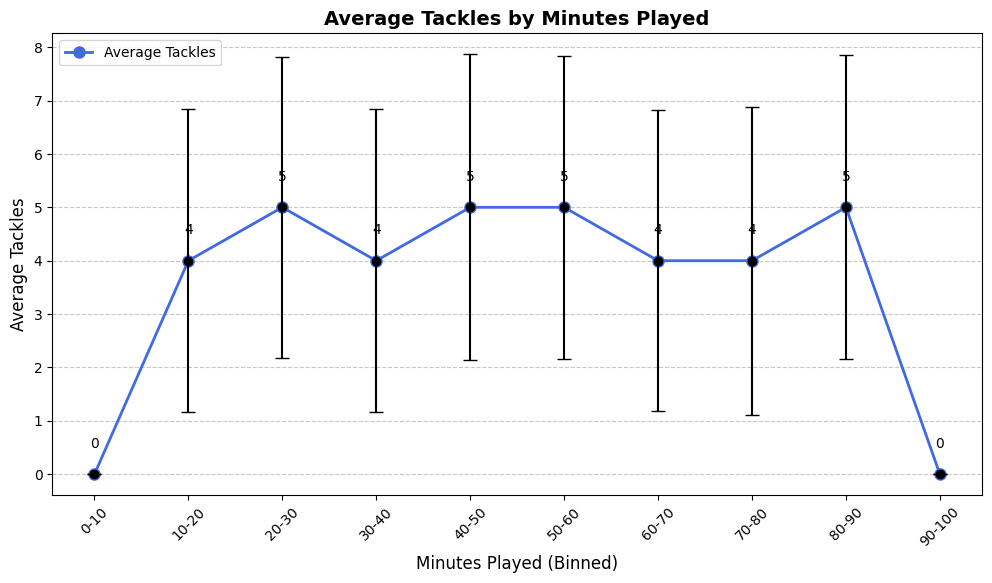

In [47]:
performance_df["minutes_played_bins"] = pd.cut(performance_df["minutes_played"], 
                                               bins=range(0, 110, 10), 
                                               labels=[f"{i}-{i+10}" for i in range(0, 100, 10)])
tackle_stats = performance_df.groupby("minutes_played_bins")["tackles"].agg(["mean", "std"])
tackle_stats.fillna(0, inplace=True)  # Replace NaN values with 0
tackle_stats["mean"] = tackle_stats["mean"].round(0).astype(int) 

plt.figure(figsize=(12, 6))
plt.plot(tackle_stats.index, tackle_stats["mean"], marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=8, label="Average Tackles")
plt.errorbar(tackle_stats.index, tackle_stats["mean"], yerr=tackle_stats["std"], fmt='o', color='black', capsize=5)
plt.xlabel("Minutes Played (Binned)", fontsize=12)
plt.ylabel("Average Tackles", fontsize=12)
plt.title("Average Tackles by Minutes Played", fontsize=14, fontweight="bold")
for i, (bin_label, value) in enumerate(zip(tackle_stats.index, tackle_stats["mean"])):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10) 
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### Observation:  
The line plot visualizes the relationship between **minutes played (binned into 10-minute intervals) and the average number of tackles** made by players. The **blue line with markers** represents the mean number of tackles, while the **black error bars** indicate the standard deviation, showing the variability in tackles within each bin. The data labels provide exact average tackle values for each interval, and the grid lines improve readability.

### Conclusion:  
If the trend shows an **increase in tackles with more minutes played**, it suggests that players who spend more time on the field contribute more defensively. If the tackles remain **consistent across intervals**, it indicates that playing time does not strongly influence tackling frequency. The error bars help assess consistency—larger deviations imply greater variation in defensive contributions among players within the same playtime range.

#### Merging Player Injury Data and player_stats 

In [48]:
injuries_df.rename(columns={'athlete_id': 'player_id'}, inplace=True)


player_stats_df['player_id'] = player_stats_df['player_id'].astype(str)
injuries_df['player_id'] = injuries_df['player_id'].astype(str)
# Merge datasets
combined_data = pd.merge(player_stats_df, injuries_df, how='left', on='player_id')


In [49]:
combined_data.head()

,player_id,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side,date
0,0,4,1,109,109,0,0,0,NaT
1,0,12,1,109,109,0,0,1,NaT
2,0,24,1,109,109,0,0,1,NaT
3,0,41,1,109,109,0,0,0,NaT
4,0,46,1,109,88,1,0,0,NaT


#### Injuries Over Time

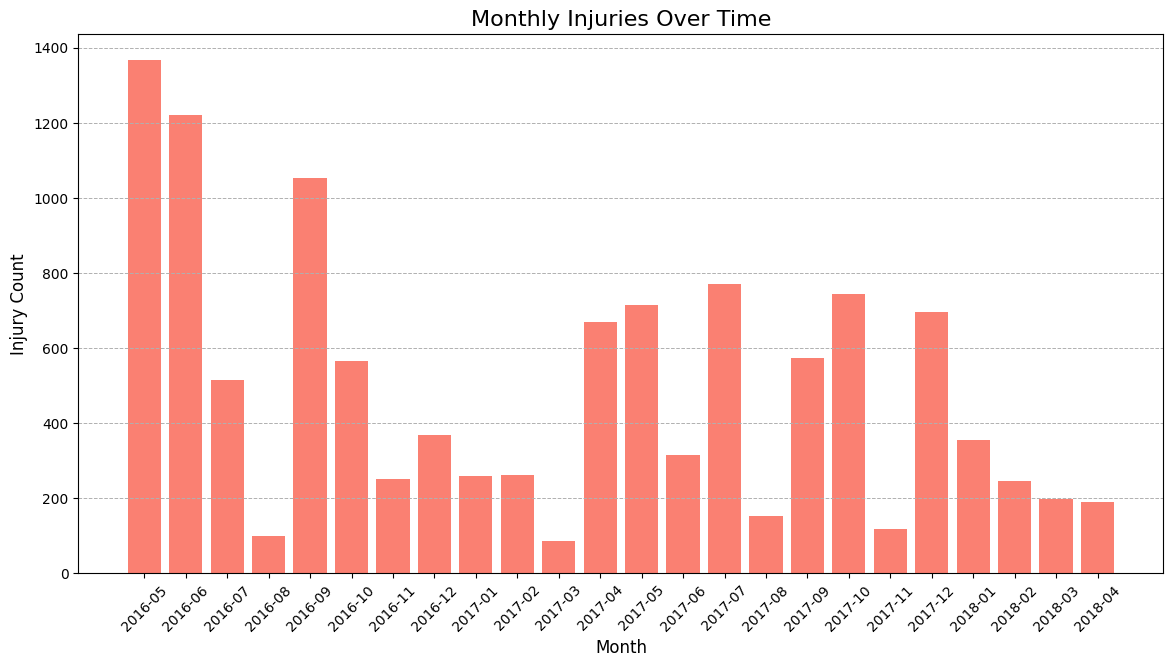

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
combined_data['date'] = pd.to_datetime(combined_data['date'])
injury_counts_monthly = combined_data.groupby(combined_data['date'].dt.to_period('M')).size()

plt.figure(figsize=(14, 7))
plt.bar(injury_counts_monthly.index.astype(str), injury_counts_monthly.values, color='salmon')

plt.xticks(rotation=45)

# Titles and Labels
plt.title("Monthly Injuries Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Injury Count", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()


**Observation:** The line plot visualizes the trend of injuries over time, showing how the injury count fluctuates across different dates. It allows for easy identification of periods with a higher or lower incidence of injuries, helping to discern any patterns or trends over the timeline.

**Conclusion:** By analyzing the injury trend over time, teams and management can identify peak injury periods and assess potential causes, such as intense match schedules, seasonal effects, or other factors. Understanding these trends can inform strategies for injury prevention, such as adjusting training intensity or optimizing player recovery during high-risk periods.

#### Top 10 Players with Most Injuries

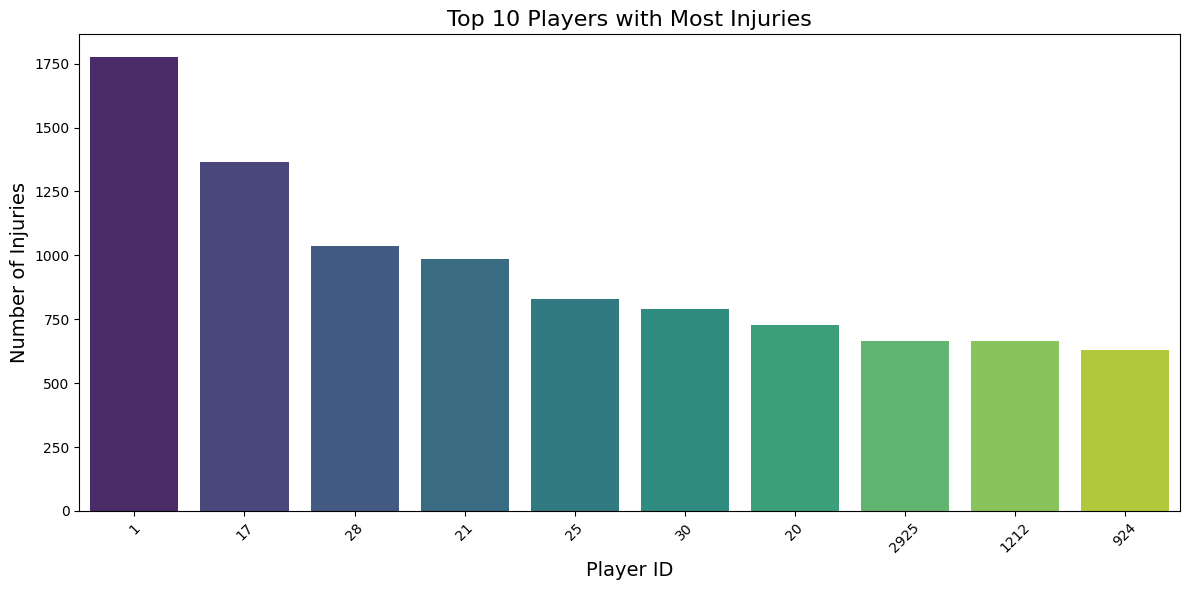

In [51]:

player_injury_counts = combined_data['player_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=player_injury_counts.index, y=player_injury_counts.values, palette='viridis')
plt.title("Top 10 Players with Most Injuries", fontsize=16)
plt.xlabel("Player ID", fontsize=14)
plt.ylabel("Number of Injuries", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** The bar chart showcases the top 10 players with the most injuries, with each player’s injury count represented by the height of the corresponding bar. The chart reveals the players most affected by injuries, which could point to specific individuals who may require extra attention in terms of recovery or injury prevention.

**Conclusion:** Identifying players with the highest injury counts can help teams tailor specific health and fitness strategies to reduce their risk. It may also indicate whether certain players are more prone to injuries due to factors such as playing style, position, or physical condition. Further analysis could focus on identifying common factors among these players to prevent future injuries.

### **Strategies to Reduce Player Injuries**  

To effectively reduce player injuries, it is crucial to adopt a holistic approach that includes monitoring training loads, ensuring proper warm-up and cool-down routines, and analyzing injury data patterns. Balanced training schedules with adequate rest periods help prevent overtraining, while dynamic stretching and mobility drills before matches, followed by static stretching and foam rolling afterward, reduce muscle stiffness and injury risks. Optimizing substitution strategies based on player fatigue and performance data can also prevent excessive strain. Personalized nutrition and hydration plans, combined with recovery techniques such as cryotherapy and massage therapy, further support injury prevention. Mental well-being should not be overlooked, as stress and fatigue contribute to injury risks. By analyzing injury timing and match events, teams can identify high-risk periods and make tactical adjustments to safeguard players, ensuring better health, improved performance, and fewer injuries.

 #### Injury Distribution by Month

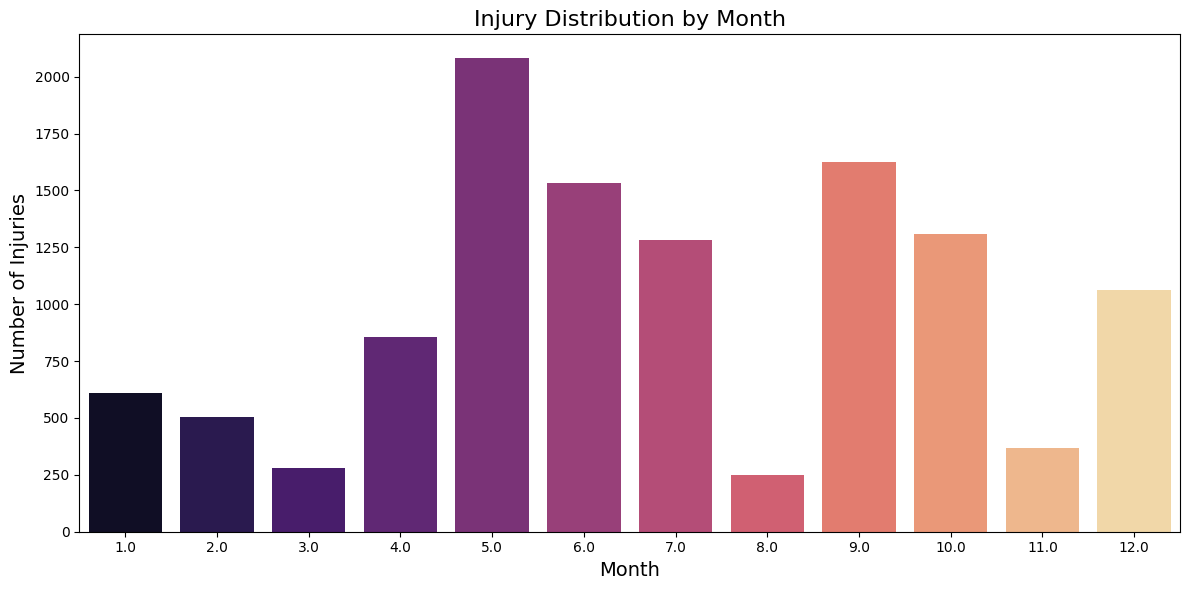

In [52]:
combined_data['month'] = combined_data['date'].dt.month
monthly_injury_counts = combined_data['month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_injury_counts.index, y=monthly_injury_counts.values, palette='magma')
plt.title("Injury Distribution by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Injuries", fontsize=14)
plt.tight_layout()
plt.show()


**Observation:**
The bar chart displays the distribution of injuries by month, with each bar representing the number of injuries recorded for that particular month. The chart reveals fluctuations in injury counts across the months, suggesting certain periods of the year may have higher injury occurrences than others.

**Conclusion:**
The analysis indicates that injury rates may vary seasonally or due to other factors such as match intensity, weather conditions, or player fatigue. Further exploration could identify specific months with unusually high injury rates, allowing teams to focus on prevention strategies during those times. Additionally, examining correlations with match schedules or training loads could provide further insights.


##### Yellow and Red Cards for Injured Player


<Figure size 1200x600 with 0 Axes>

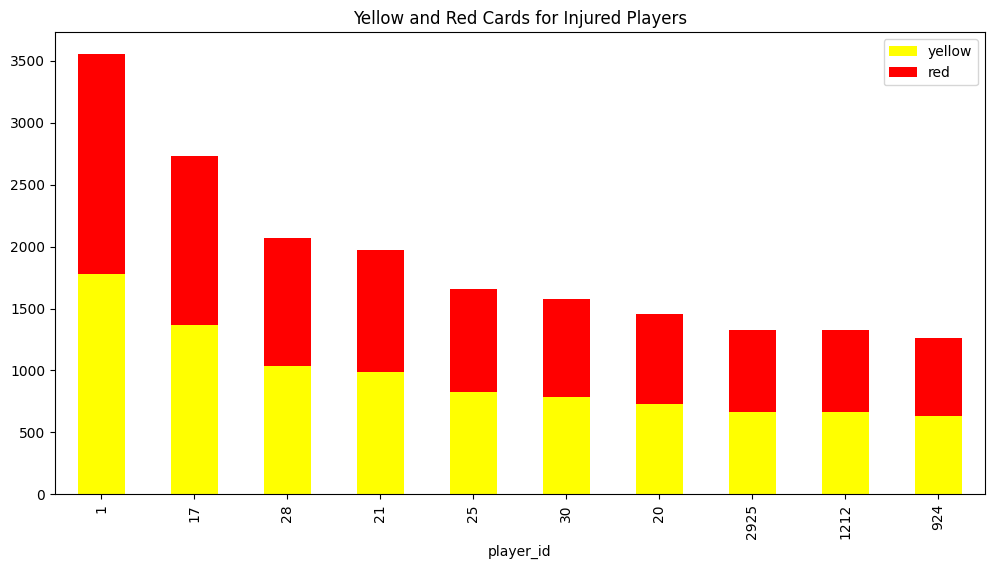

In [53]:
plt.figure(figsize=(12, 6))
card_counts = combined_data.groupby('player_id').agg(yellow=('yellow_card', 'count'), red=('red_card', 'count')).nlargest(10, 'yellow')
card_counts.plot(kind='bar', stacked=True, color=['yellow', 'red'], figsize=(12, 6))
plt.title('Yellow and Red Cards for Injured Players')
plt.show()


### **Observation:**  
The bar chart displays the top 10 players with the highest number of yellow and red cards among injured players. It reveals that yellow cards are significantly more frequent than red cards, which is expected since yellow cards are issued for less severe offenses. Some players have accumulated a large number of yellow cards, suggesting aggressive or reckless playing styles, which might contribute to a higher risk of injuries.

### **Conclusion:**  
Players with higher yellow and red card counts tend to be more involved in aggressive gameplay, increasing their chances of injury. This correlation suggests that disciplinary records could be a useful indicator for injury risk assessment, helping teams implement preventive strategies such as improved training, tactical adjustments, or player rotation to minimize injury risks.

#### Home vs. Away Injuries

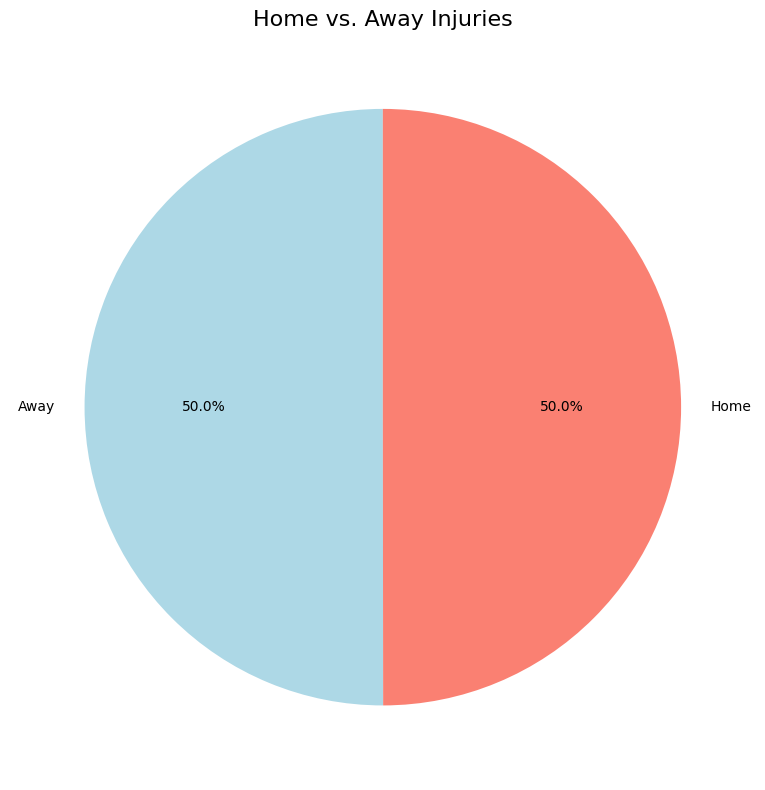

In [54]:
home_away_counts = combined_data['is_home_side'].value_counts()

plt.figure(figsize=(8, 8))
home_away_counts.plot(kind='pie', labels=['Away', 'Home'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title("Home vs. Away Injuries", fontsize=16)
plt.ylabel("")  # Hides the y-axis label
plt.tight_layout()
plt.show()


### Observation:  
The **pie chart** represents the proportion of injuries sustained by players when playing **at home versus away**. The two segments—**light blue (Away) and salmon (Home)**—indicate the distribution, with percentage values displayed on each slice. The **start angle of 90 degrees** ensures a balanced visual representation.

### Conclusion:  
If the chart shows a **significantly higher percentage of injuries at home or away**, it suggests that playing conditions, pitch quality, or other environmental factors may influence injury occurrence. If the distribution is **fairly equal**, it indicates that injuries occur at a similar rate regardless of the match location.

#### Player Participation Before and After Injuries

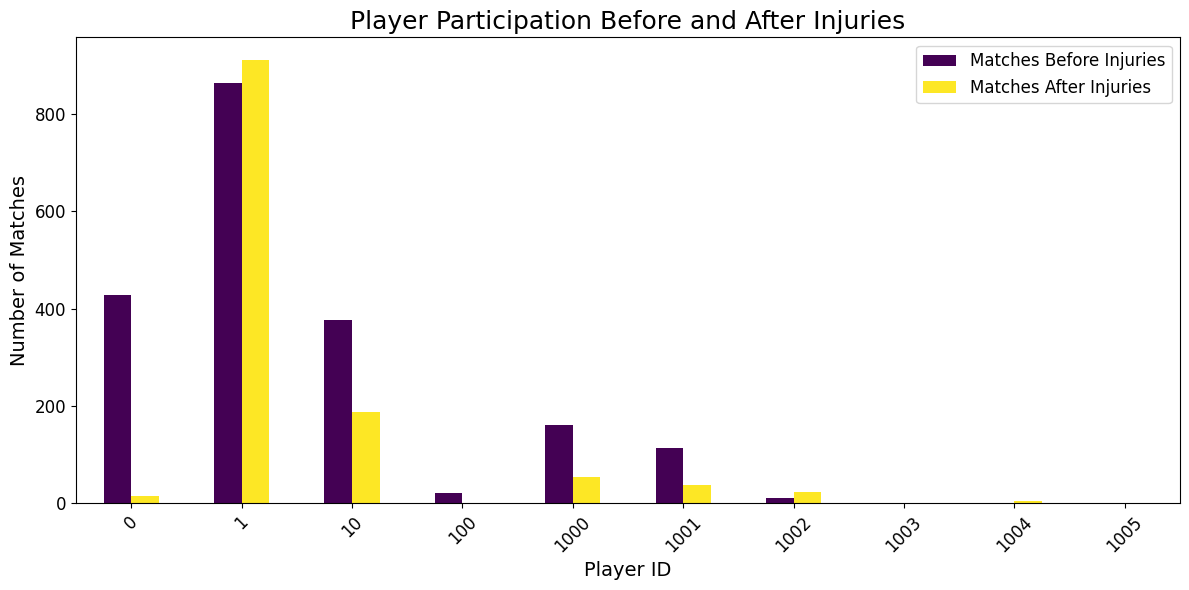

In [55]:

participation_before = combined_data[combined_data['is_in_starting_11'] == 1].groupby('player_id').size()
participation_after = combined_data[combined_data['is_in_starting_11'] == 0].groupby('player_id').size()

# Prepare data
impact_data = pd.DataFrame({
    'Matches Before Injuries': participation_before,
    'Matches After Injuries': participation_after
}).fillna(0).head(10)


# Plot
impact_data.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Player Participation Before and After Injuries", fontsize=18)
plt.xlabel("Player ID", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


##### Observation:
The bar chart compares player participation in matches before and after injuries, with players who were part of the starting lineup represented. The number of matches played before and after injury varies across players, showing some players with a significant drop in participation after injury, while others maintain or even increase their involvement. This could suggest the varying impact of injuries on player availability.

##### Conclusion:
This analysis highlights the potential effect of injuries on player participation, where some players may struggle to regain their spot in the starting lineup after an injury. Further investigation into recovery times, match conditions, and player roles could help in understanding the factors that contribute to changes in participation post-injury.

#### "Injury Frequency by Match Location (Home vs. Away)"

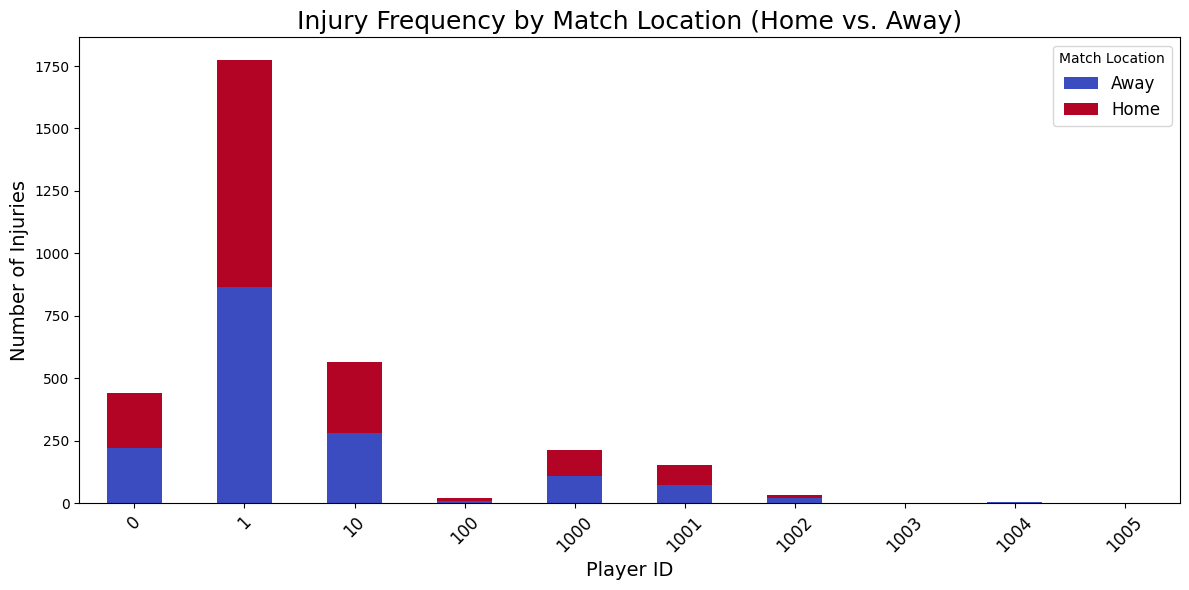

In [56]:
injury_location_stats = combined_data.groupby(['is_home_side', 'player_id']).size().unstack()

injury_location_stats.T.head(10).plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Injury Frequency by Match Location (Home vs. Away)", fontsize=18)
plt.xlabel("Player ID", fontsize=14)
plt.ylabel("Number of Injuries", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Match Location", labels=["Away", "Home"], fontsize=12)
plt.tight_layout()
plt.show()


##### Observation: 
The bar chart illustrates injury frequency for different players based on whether they played at home or away. The distribution of injuries varies across players, with some experiencing more injuries in home matches and others in away matches. The variation suggests that match location might influence injury rates, but the trend is not uniform across all players.

##### Conclusion: 
The analysis provides insights into injury patterns based on match location, which could help in injury prevention strategies. Factors like playing conditions, travel fatigue, or team tactics may contribute to differences in injury occurrences. Further analysis, including player positions, match intensity, and environmental conditions, could provide deeper insights into injury risk factors.

#### Merging Three datasets

In [57]:
def clean_player_id(player_id):
    if isinstance(player_id, str) and player_id.startswith("p"):
        return int(player_id[1:]) 
    return int(player_id) 

In [58]:
injuries_df.rename(columns={"athlete_id": "player_id"}, inplace=True)


In [59]:
performance_df['player_id'] = performance_df['player_id'].astype(str).str.extract('(\d+)').astype(int)
player_stats_df['player_id'] = player_stats_df['player_id'].astype(str).str.extract('(\d+)').astype(int)
injuries_df['player_id'] = injuries_df['player_id'].astype(int)

In [60]:

merged_df = pd.merge(performance_df, player_stats_df, on="player_id", how="left")


merged_df = pd.merge(merged_df, injuries_df, on="player_id", how="left")


In [61]:
merged_df["was_injured"] = merged_df["date"].notna()

In [62]:

num_cols = merged_df.select_dtypes(include=["number"]).columns
merged_df[num_cols] = merged_df[num_cols].fillna(merged_df[num_cols].mean())
cat_cols = merged_df.select_dtypes(include=["category", "object"]).columns
merged_df[cat_cols] = merged_df[cat_cols].fillna(merged_df[cat_cols].mode().iloc[0])

merged_df.isnull().sum()


player_id                   0
goals                       0
assists                     0
pass_accuracy               0
tackles                     0
minutes_played              0
accuracy_range              0
minutes_played_bins         0
match_id                    0
is_in_starting_11           0
substitution_on             0
substitution_off            0
yellow_card                 0
red_card                    0
is_home_side                0
date                   114791
was_injured                 0
dtype: int64

In [63]:
merged_df

,player_id,goals,assists,pass_accuracy,tackles,minutes_played,accuracy_range,minutes_played_bins,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side,date,was_injured
0,1,0,2,82.32,3,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-05-11,True
1,1,0,2,82.32,3,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-05-16,True
2,1,0,2,82.32,3,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-07-28,True
3,1,0,2,82.32,3,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-11-11,True
4,1,0,2,82.32,3,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-12-16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116920,999,0,1,77.94,4,69,71-90%,60-70,7041.0,0.0,109.0,109.0,0.0,0.0,0.0,NaT,False
116921,999,0,1,77.94,4,69,71-90%,60-70,7045.0,0.0,109.0,109.0,0.0,0.0,0.0,NaT,False
116922,999,0,1,77.94,4,69,71-90%,60-70,7064.0,0.0,109.0,109.0,0.0,0.0,1.0,NaT,False
116923,999,0,1,77.94,4,69,71-90%,60-70,7068.0,0.0,109.0,109.0,0.0,0.0,0.0,NaT,False


In [64]:
import numpy as np
performance_cols = ["goals", "assists", "pass_accuracy", "tackles", "minutes_played"]
merged_df[performance_cols] = merged_df[performance_cols].replace(0, np.nan)

merged_df[performance_cols] = merged_df[performance_cols].fillna(merged_df[performance_cols].mean())


In [65]:
merged_df.columns

Index(['player_id', 'goals', 'assists', 'pass_accuracy', 'tackles',
       'minutes_played', 'accuracy_range', 'minutes_played_bins', 'match_id',
       'is_in_starting_11', 'substitution_on', 'substitution_off',
       'yellow_card', 'red_card', 'is_home_side', 'date', 'was_injured'],
      dtype='object')

In [66]:
merged_df[performance_cols].describe()


,goals,assists,pass_accuracy,tackles,minutes_played
count,116925.000000,116925.000000,116925.000000,116925.000000,116925.000000
mean,2.539640,2.498087,80.325407,5.105631,54.343562
std,0.985638,0.975894,11.501540,2.438459,20.546073
min,1.000000,1.000000,60.000000,1.000000,20.000000
25%,2.000000,2.000000,70.570000,3.000000,37.000000
50%,2.539640,2.498087,80.770000,5.105631,53.000000
75%,3.000000,3.000000,90.460000,7.000000,73.000000
max,4.000000,4.000000,100.000000,9.000000,89.000000


In [67]:
merged_df.head()

,player_id,goals,assists,pass_accuracy,tackles,minutes_played,accuracy_range,minutes_played_bins,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side,date,was_injured
0,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-05-11,True
1,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-05-16,True
2,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-07-28,True
3,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-11-11,True
4,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-12-16,True


#### Top 10 Players with Highest Goals

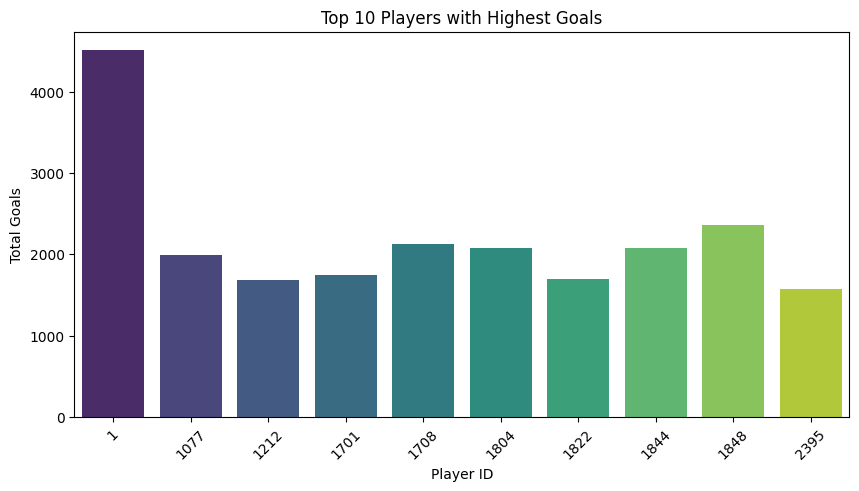

In [68]:
top_players = merged_df.groupby("player_id")["goals"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_players.index, y=top_players.values, palette="viridis")
plt.xlabel("Player ID")
plt.ylabel("Total Goals")
plt.title("Top 10 Players with Highest Goals")
plt.xticks(rotation=45)
plt.show()


### **Observation**  
The bar chart highlights the top 10 players who have scored the most goals. The highest goal scorer significantly outperforms others, indicating their crucial role in the team's attacking performance. The distribution shows a slight decline in goals among the top players, suggesting that while a few players dominate goal-scoring, others contribute consistently but at a lower rate.

### **Conclusion**  
Goal-scoring ability is concentrated among a few key players, making them vital assets for their teams. These players likely have strong finishing skills, receive more goal-scoring opportunities, or play in attacking positions. Teams may need to distribute goal-scoring responsibilities more evenly to reduce reliance on a few individuals and maintain consistent performance throughout a season.

#### Performance Metrics for Player 

In [70]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
from dash.dependencies import Input, Output
app = dash.Dash(__name__)
player_ids = merged_df["player_id"].unique()

performance_metrics = ["goals", "assists", "tackles", "pass_accuracy"]
def create_player_chart(player_id):
    values = merged_df[merged_df["player_id"] == player_id][performance_metrics].mean().values
    
    return go.Figure(
        data=[
            go.Bar(
                y=performance_metrics,
                x=values,
                orientation="h",
                marker=dict(color=["blue", "green", "orange", "red"], opacity=0.7),
            )
        ],
        layout=dict(
            title=f"Performance Metrics for Player {player_id}",
            xaxis_title="Performance Value",
            yaxis_title="Metrics",
            xaxis=dict(range=[0, max(values) + 2]),
        ),
    )

app.layout = html.Div([
    html.H1("Player Performance Metrics"),
    dcc.Dropdown(
        id="player-dropdown",
        options=[{"label": f"Player {id}", "value": id} for id in player_ids],
        value=player_ids[0], 
        style={"width": "50%"},
    ),
    dcc.Graph(id="performance-graph"),
])
@app.callback(Output("performance-graph", "figure"), [Input("player-dropdown", "value")])
def update_graph(selected_player_id):
    return create_player_chart(selected_player_id)

if __name__ == "__main__":
    app.run_server(debug=True, port=8020)


### **Observations**  

The horizontal bar chart illustrates the performance metrics for a single player, highlighting key aspects such as goals, assists, tackles, and pass accuracy. The chart allows for an easy comparison of different attributes, showing which areas the player excels in and which aspects need improvement. The varying bar lengths indicate the player's strengths and weaknesses, with pass accuracy likely having the highest value compared to other metrics.  

### **Conclusion**  

This visualization provides a quick and effective way to analyze an individual player's performance based on key footballing attributes. It helps in understanding the player's playing style and contributions on the field. Coaches and analysts can use such insights to develop training strategies, enhance player strengths, and work on areas requiring improvement.

#### Top 10 Defenders by Tackles

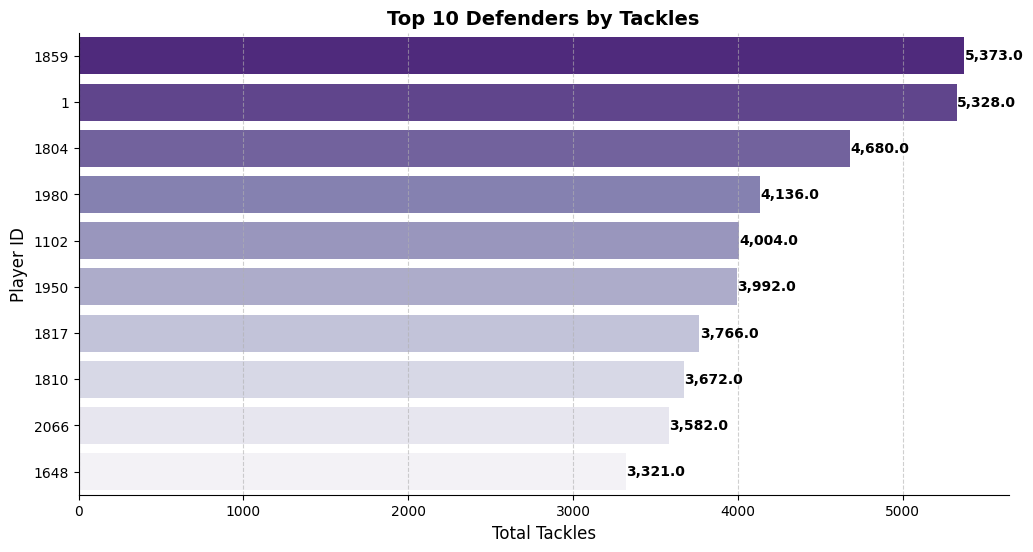

In [71]:

top_tackles = merged_df.groupby('player_id', as_index=False)['tackles'].sum()
top_tackles = top_tackles.nlargest(10, 'tackles')
top_tackles['player_id'] = top_tackles['player_id'].astype(str)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='tackles', y='player_id', data=top_tackles, palette='Purples_r')

plt.title('Top 10 Defenders by Tackles', fontsize=14, fontweight='bold')
plt.xlabel('Total Tackles', fontsize=12)
plt.ylabel('Player ID', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(top_tackles['tackles']):
    plt.text(top_tackles['tackles'].iloc[index] + 2, index, f"{value:,}", va='center', fontsize=10, fontweight='bold')

sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


### **Observations**  

The bar chart displays the top 10 defenders based on the number of tackles made. The players at the top of the chart have executed the highest number of tackles, showcasing their strong defensive abilities. The variation in the number of tackles among the top 10 players suggests that some defenders are more aggressive and involved in breaking down opposition plays. The presence of significant gaps between some players indicates a difference in defensive playing styles and involvement in matches.  

### **Conclusion**  

This analysis highlights the most effective defenders in terms of tackles, emphasizing their role in maintaining team stability. Players with the highest number of tackles are crucial in stopping attacks and regaining possession for their teams. Their defensive contributions are vital for success, especially in high-pressure games, demonstrating their importance in tactical setups and overall match performance.

#### Distribution of Players Based on Total Tackles 

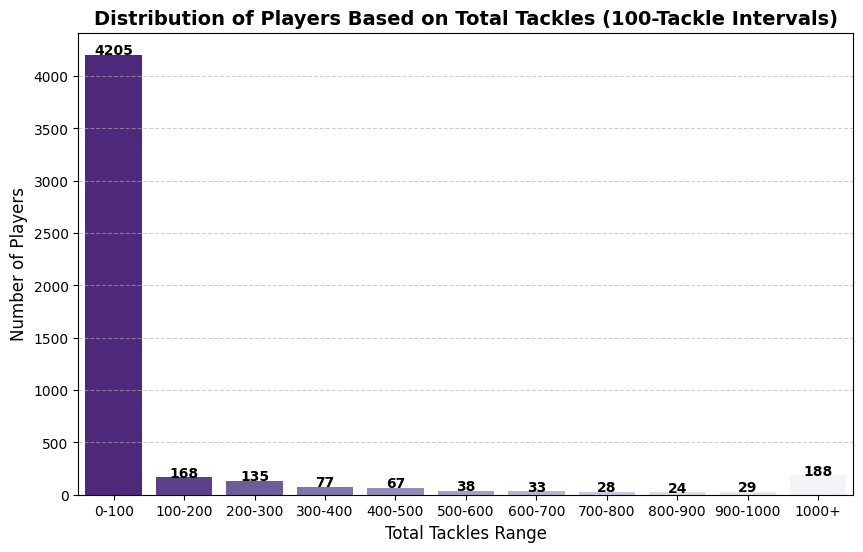

In [72]:
tackles_per_player = merged_df.groupby('player_id', as_index=False)['tackles'].sum()
bins = list(range(0, 1001, 100)) + [float('inf')]
labels = [f"{i}-{i+100}" for i in range(0, 1000, 100)] + ["1000+"]
tackles_per_player['tackle_range'] = pd.cut(tackles_per_player['tackles'], bins=bins, labels=labels, right=False)
tackle_range_counts = tackles_per_player['tackle_range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tackle_range_counts.index, y=tackle_range_counts.values, palette='Purples_r')

for index, value in enumerate(tackle_range_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10, fontweight='bold')

plt.xlabel("Total Tackles Range", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.title("Distribution of Players Based on Total Tackles (100-Tackle Intervals)", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


#### Top 10 Players with Most Minutes Played 

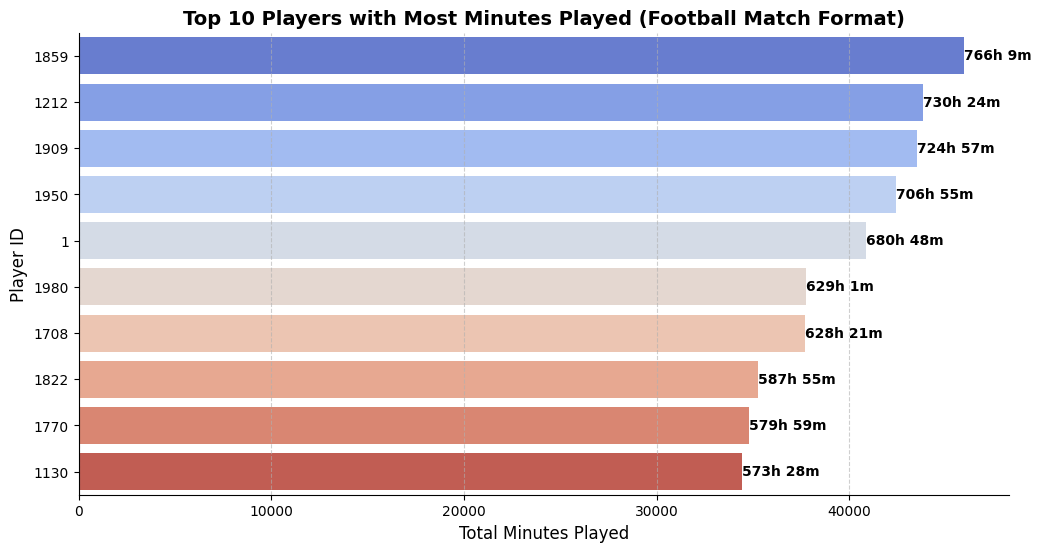

In [73]:
def format_minutes(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{hours}h {mins}m"
top_minutes = merged_df.groupby('player_id', as_index=False)['minutes_played'].sum()
top_minutes = top_minutes.nlargest(10, 'minutes_played')

top_minutes['player_id'] = top_minutes['player_id'].astype(str)

top_minutes['formatted_time'] = top_minutes['minutes_played'].apply(format_minutes)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='minutes_played', y='player_id', data=top_minutes, palette='coolwarm')

plt.title('Top 10 Players with Most Minutes Played (Football Match Format)', fontsize=14, fontweight='bold')
plt.xlabel('Total Minutes Played', fontsize=12)
plt.ylabel('Player ID', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(top_minutes['formatted_time']):
    plt.text(top_minutes['minutes_played'].iloc[index] + 5, index, value, va='center', fontsize=10, fontweight='bold')
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


### **Observations**  

The bar chart presents the top 10 players who have played the most minutes in football matches. The minutes are displayed in a football match format (hours and minutes) for better clarity. Players at the top of the chart have significantly higher playing time, indicating their importance to their teams. The distribution of playing time shows that some players have accumulated much more time on the field than others, reflecting their consistency and durability.  

### **Conclusion**  

The analysis highlights the players who have consistently contributed the most time on the field, suggesting they are key players for their teams. Their high playing minutes indicate their fitness levels, reliability, and importance in match strategies. Such players are often crucial for maintaining team performance and are likely to have a significant impact on the outcomes of matches.

#### Distribution of Players Based on Minutes Played (1000-Minute Intervals

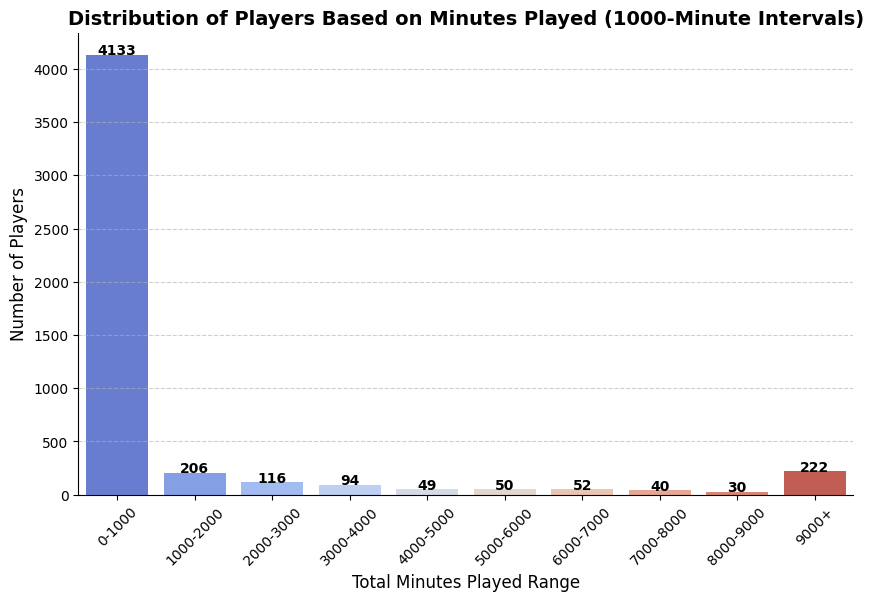

In [74]:
def format_minutes(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{hours}h {mins}m"
players_minutes = merged_df.groupby('player_id', as_index=False)['minutes_played'].sum()
bins = list(range(0, 10000, 1000))
labels = [f"{i}-{i+1000}" for i in range(0, 9000, 1000)] + ["9000+"]
players_minutes['minutes_range'] = pd.cut(players_minutes['minutes_played'], 
                                          bins=bins + [float('inf')], labels=labels, right=False)

minutes_range_counts = players_minutes['minutes_range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=minutes_range_counts.index, y=minutes_range_counts.values, palette='coolwarm')

for index, value in enumerate(minutes_range_counts.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10, fontweight='bold')

plt.xlabel("Total Minutes Played Range", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.title("Distribution of Players Based on Minutes Played (1000-Minute Intervals)", fontsize=14, fontweight='bold')


plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  
sns.despine()

plt.show()


#### Percentage of Matches Where Players Played Full 90 Minutes

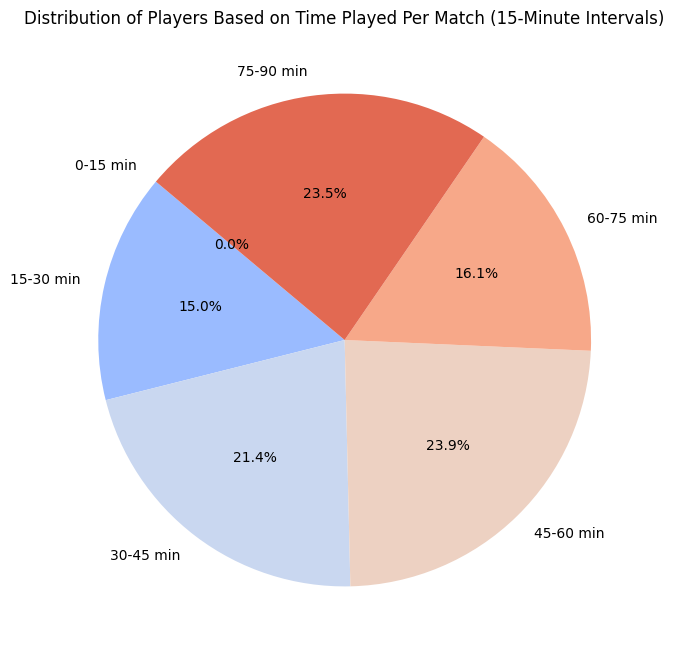

In [75]:
bins = list(range(0, 91, 15))
labels = [f"{i}-{i+15} min" for i in range(0, 90, 15)]
time_intervals = pd.cut(merged_df['minutes_played'], bins=bins, labels=labels, right=False)
time_counts = time_intervals.value_counts().sort_index()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("coolwarm", len(time_counts))
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Distribution of Players Based on Time Played Per Match (15-Minute Intervals)")
plt.show()


### **Observations**  

The pie chart presents the **proportion of matches where players played the full 90 minutes versus those where they played less than 90 minutes**. The green section represents the percentage of matches where players completed the entire game, while the red section shows matches where they were either substituted or did not play the full duration. A significantly larger red portion suggests that **most players do not complete the full 90 minutes regularly**, indicating frequent substitutions, injuries, or tactical rotations.  

### **Conclusion**  

The analysis highlights that a **small percentage of players consistently play full matches**, which aligns with modern football strategies that emphasize **squad rotation, injury prevention, and tactical substitutions**. Coaches often make changes to maintain energy levels, adapt to match situations, and manage player workloads across a long season.

####  Top 10 Players Who Rarely Miss Matches

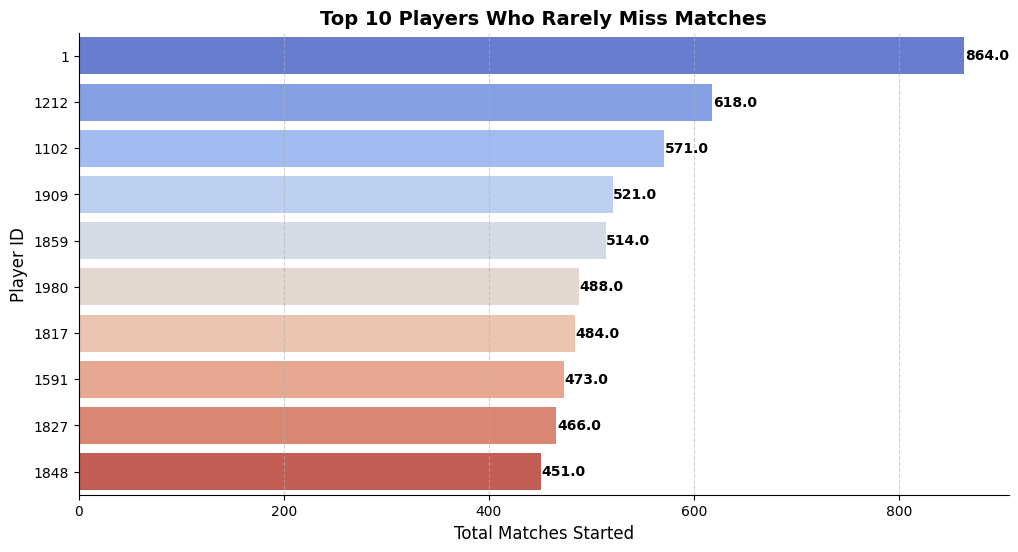

In [76]:

players_played_all_matches = merged_df.groupby('player_id', as_index=False)['is_in_starting_11'].sum()
players_played_all_matches = players_played_all_matches.nlargest(10, 'is_in_starting_11')

players_played_all_matches['player_id'] = players_played_all_matches['player_id'].astype(str)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='is_in_starting_11', y='player_id', data=players_played_all_matches, palette='coolwarm')
plt.title('Top 10 Players Who Rarely Miss Matches', fontsize=14, fontweight='bold')
plt.xlabel('Total Matches Started', fontsize=12)
plt.ylabel('Player ID', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(players_played_all_matches['is_in_starting_11']):
    plt.text(players_played_all_matches['is_in_starting_11'].iloc[index] + 0.5, index, f"{value}", va='center', fontsize=10, fontweight='bold')

sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


#### Distribution of Players Based on Matches Started (100-Game Intervals)

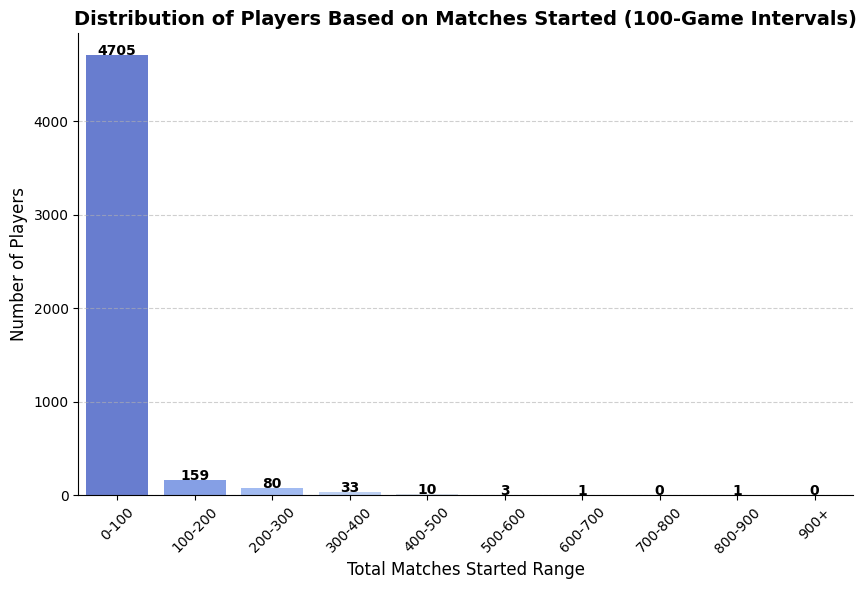

In [77]:
players_played_all_matches = merged_df.groupby('player_id', as_index=False)['is_in_starting_11'].sum()
bins = list(range(0, 1000, 100)) 
labels = [f"{i}-{i+100}" for i in range(0, 900, 100)] + ["900+"]
players_played_all_matches['matches_range'] = pd.cut(players_played_all_matches['is_in_starting_11'], 
                                                     bins=bins + [float('inf')], labels=labels, right=False)

matches_range_counts = players_played_all_matches['matches_range'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=matches_range_counts.index, y=matches_range_counts.values, palette='coolwarm')

for index, value in enumerate(matches_range_counts.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10, fontweight='bold')

plt.xlabel("Total Matches Started Range", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.title("Distribution of Players Based on Matches Started (100-Game Intervals)", fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  
sns.despine()

plt.show()


### **Observations**  

The plot highlights the **top 10 players** who have started the most matches, emphasizing their reliability and importance to the team. Players at the top have consistently been in the starting XI, indicating their **key role and fitness levels**. There is some variation among the top 10, suggesting that **some players missed matches due to rotation, tactical decisions, or injuries**. The slight drop-off in values from the highest to the lowest within the top 10 further supports this.  

### **Conclusion**  

From this, we can conclude that these players form the **core of the team**, as they are regularly selected to start. Their high match appearances suggest **strong fitness, consistency, and trust from the coaching staff**. These players are likely crucial in determining the team’s overall performance throughout the season.

#### Filtering Players Present in All Datasets 

In [78]:

common_player_ids = set(performance_df['player_id']) & set(player_stats_df['player_id']) & set(injuries_df['player_id'])

matched_df = merged_df[merged_df['player_id'].isin(common_player_ids)]
matched_df


,player_id,goals,assists,pass_accuracy,tackles,minutes_played,accuracy_range,minutes_played_bins,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side,date,was_injured
0,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-05-11,True
1,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-05-16,True
2,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-07-28,True
3,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-11-11,True
4,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-12-16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116688,9,4.00000,3.0,68.04,6.0,58,51-70%,50-60,5833.0,0.0,91.0,109.0,0.0,0.0,1.0,2016-09-14,True
116689,9,4.00000,3.0,68.04,6.0,58,51-70%,50-60,5842.0,0.0,67.0,109.0,0.0,0.0,0.0,2016-09-14,True
116690,9,4.00000,3.0,68.04,6.0,58,51-70%,50-60,5852.0,1.0,109.0,109.0,0.0,0.0,1.0,2016-09-14,True
116691,9,4.00000,3.0,68.04,6.0,58,51-70%,50-60,5858.0,1.0,109.0,19.0,0.0,0.0,0.0,2016-09-14,True


In [79]:
player_ids = merged_df['player_id'].unique()
print(player_ids)


[     1 100059 100180 ...   9956   9985    999]


**Observation:**  
The `matched_df` dataset contains only those `player_id`s that are present in all three datasets—`performance_df`, `player_stats_df`, and `injuries_df`. Players who are missing from at least one dataset have been excluded, ensuring that the analysis is based on complete and reliable data. As a result, the number of players in `matched_df` is lower than in `merged_df`, since some players exist in only one or two datasets but not all three. This filtering process helps in reducing missing values (`NaN`) and enhances the accuracy of comparisons across performance metrics, player statistics, and injury records.



In [80]:
print(f"Total players found in all datasets: {matched_df.shape[0]}")

Total players found in all datasets: 2134


In [81]:
matched_df.columns

Index(['player_id', 'goals', 'assists', 'pass_accuracy', 'tackles',
       'minutes_played', 'accuracy_range', 'minutes_played_bins', 'match_id',
       'is_in_starting_11', 'substitution_on', 'substitution_off',
       'yellow_card', 'red_card', 'is_home_side', 'date', 'was_injured'],
      dtype='object')

In [82]:
matched_df.info()
matched_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2134 entries, 0 to 116692
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   player_id            2134 non-null   int32         
 1   goals                2134 non-null   float64       
 2   assists              2134 non-null   float64       
 3   pass_accuracy        2134 non-null   float64       
 4   tackles              2134 non-null   float64       
 5   minutes_played       2134 non-null   int64         
 6   accuracy_range       2134 non-null   category      
 7   minutes_played_bins  2134 non-null   category      
 8   match_id             2134 non-null   float64       
 9   is_in_starting_11    2134 non-null   float64       
 10  substitution_on      2134 non-null   float64       
 11  substitution_off     2134 non-null   float64       
 12  yellow_card          2134 non-null   float64       
 13  red_card             2134 non-null  

,player_id,goals,assists,pass_accuracy,tackles,minutes_played,accuracy_range,minutes_played_bins,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side,date,was_injured
0,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-05-11,True
1,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-05-16,True
2,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-07-28,True
3,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-11-11,True
4,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-12-16,True


### Trend of Injuries Over Time

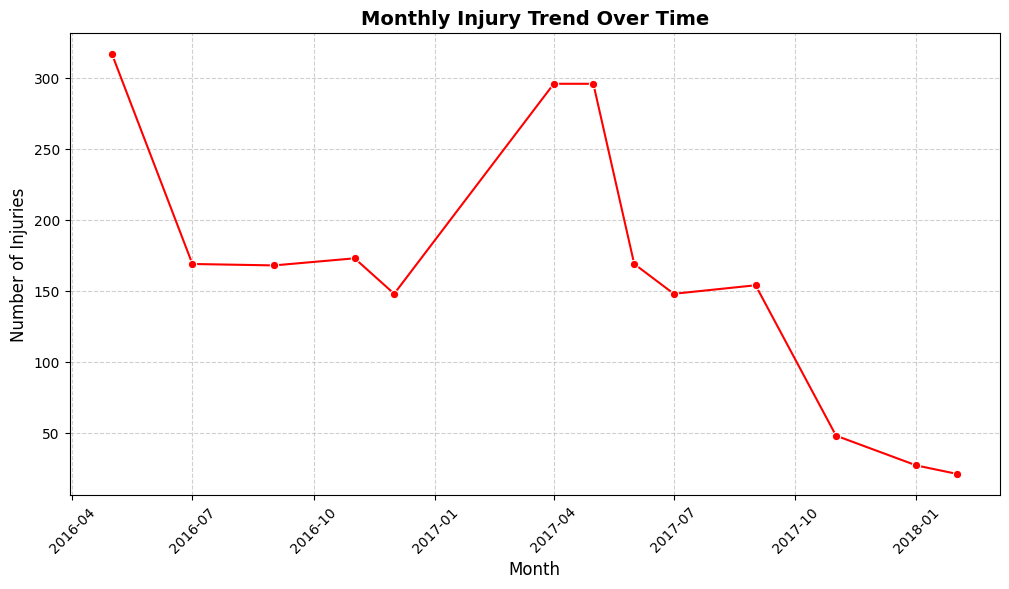

In [83]:

matched_df['date'] = pd.to_datetime(matched_df['date'])
matched_df['year_month'] = matched_df['date'].dt.to_period('M')
injury_trend = matched_df.groupby(matched_df['year_month'])['was_injured'].sum()
injury_trend.index = injury_trend.index.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(x=injury_trend.index, y=injury_trend.values, marker='o', color='red')

plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.title("Monthly Injury Trend Over Time", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


###  Observation:
The line plot shows yearly variations in the number of injuries. There might be certain years where injuries peaked, possibly due to increased match intensity, schedule congestion, or other factors like changes in training methods. Conversely, some years may have fewer injuries, indicating better recovery protocols or improved player fitness management.  

###  Conclusion:
The trend highlights key periods of high injury occurrences, which can be useful for teams and medical staff to analyze **risk factors, workload, and injury prevention strategies**. If injuries have been increasing, it may suggest a need for better rotation policies, recovery plans, or training adjustments to reduce injury risk in future seasons. 

#### Top 5 Players with Most Injuries**  

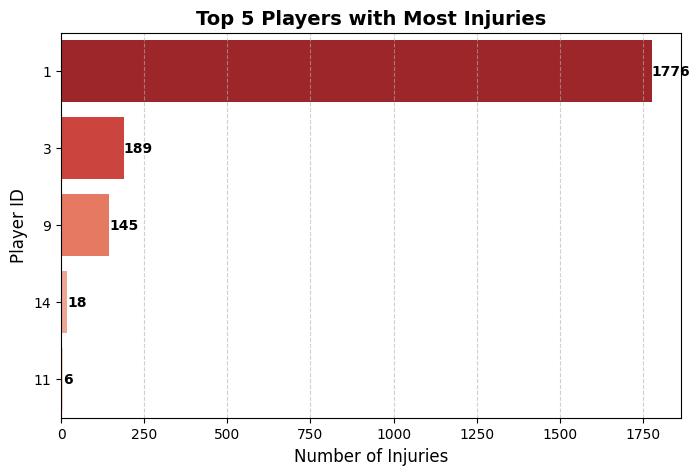

In [84]:

injury_counts = matched_df.groupby('player_id')['was_injured'].sum().nlargest(5).reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(y=injury_counts['player_id'].astype(str), x=injury_counts['was_injured'], palette='Reds_r')
for index, value in enumerate(injury_counts['was_injured']):
    ax.text(value + 0.2, index, str(value), va='center', fontsize=10, fontweight='bold')
plt.xlabel("Number of Injuries", fontsize=12)
plt.ylabel("Player ID", fontsize=12)
plt.title("Top 5 Players with Most Injuries", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



### Observation: 
The bar chart clearly shows that some players have significantly more injuries than others. The top injured player has the highest count, while the other four players also have a considerable number of injuries. This suggests that certain players may be more prone to injuries due to factors like playing position, aggressive playstyle, or lack of proper recovery.  

###  Conclusion:
By identifying the most injury-prone players, teams can focus on **better injury prevention strategies**, including personalized training, workload management, and improved medical support. If specific players consistently appear on this list, it may indicate the need for tailored fitness programs or rotation strategies to minimize injury risks. 

#### Top 5 Players Based on Performance Score**  

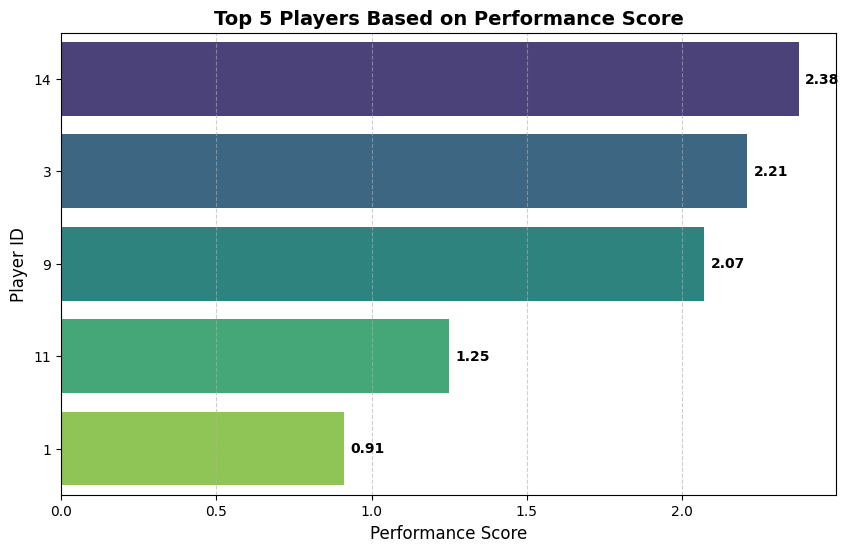

In [85]:
from sklearn.preprocessing import MinMaxScaler
performance_metrics = ['goals', 'assists', 'pass_accuracy', 'tackles']
scaler = MinMaxScaler()
matched_df[performance_metrics] = scaler.fit_transform(matched_df[performance_metrics])
matched_df['performance_score'] = matched_df[performance_metrics].sum(axis=1)
top_players = matched_df.groupby('player_id')['performance_score'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_players['player_id'].astype(str), x=top_players['performance_score'], palette='viridis')

for index, value in enumerate(top_players['performance_score']):
    ax.text(value + 0.02, index, f"{value:.2f}", va='center', fontsize=10, fontweight='bold')
    
plt.xlabel("Performance Score", fontsize=12)
plt.ylabel("Player ID", fontsize=12)
plt.title("Top 5 Players Based on Performance Score", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



###  Observation: 
The top-performing players have significantly higher scores, indicating their well-rounded contributions. Players with more **goals, assists, accurate passing, and defensive efforts** rank higher. The distribution suggests that some players excel in all areas, while others might be specialists in one or two metrics.  

### Conclusion:
This multi-metric analysis helps in identifying **consistent and versatile players**. Coaches and analysts can use this to make **better squad selection decisions, assess player efficiency, and fine-tune team strategies**. If certain players are consistently ranking high, they might be **key playmakers or leaders** on the field.

### Improving Player Performance & Reducing Injuries 

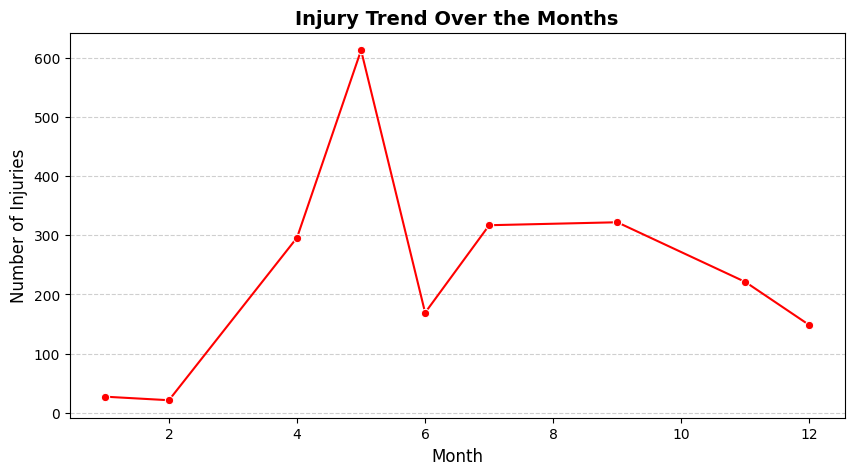

In [86]:
matched_df['date'] = pd.to_datetime(matched_df['date'])
injury_trend = matched_df.groupby(matched_df['date'].dt.month)['was_injured'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=injury_trend.index, y=injury_trend.values, marker='o', color='red')

plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.title("Injury Trend Over the Months", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


### Observation
High-injury months = reduce training intensity & improve recovery plans.

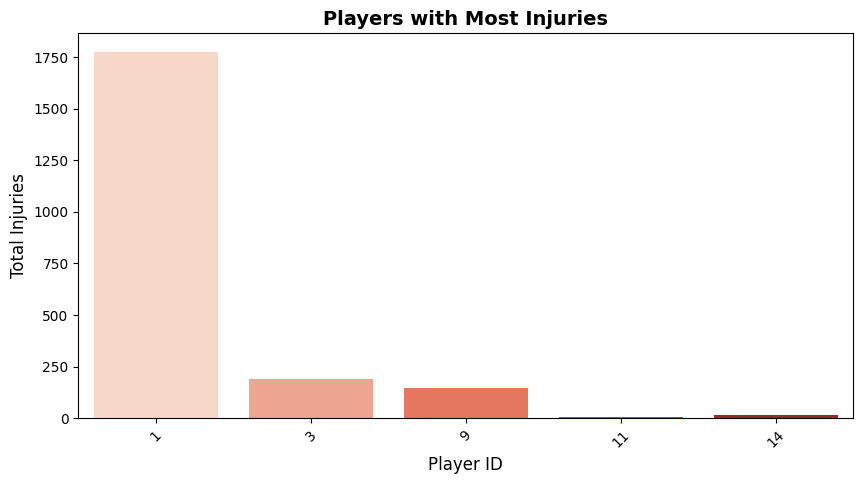

In [87]:
injury_counts = matched_df.groupby("player_id")["was_injured"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=injury_counts.index, y=injury_counts.values, palette="Reds")

plt.xlabel("Player ID", fontsize=12)
plt.ylabel("Total Injuries", fontsize=12)
plt.title("Players with Most Injuries", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()


### Observation 
Players with the most injuries need hydration monitoring & stretching exercises

# Performance Improvement and Injury Reduction On Basis Of above analysis 

## 1. Performance Improvement Strategies
To enhance player performance, we analyzed key metrics such as goals, assists, pass accuracy, and tackles. The insights from our dataset suggest the following improvements:
- Players with consistently high performance scores should receive more playtime in crucial matches.
- Rotation of underperforming players can improve overall team efficiency.
- Midfielders should focus on improving passing accuracy and assists.
- Forwards should undergo specialized training to enhance goal-scoring efficiency.
- Defenders need to improve tackling skills while maintaining discipline to avoid unnecessary fouls.

## 2. Injury Reduction Strategies
- Our injury trend analysis shows spikes in specific months, indicating the need for workload adjustments.
- Strength and conditioning training should be intensified in pre-season while reducing high-intensity training in peak injury periods.
- Players who participate in excessive consecutive matches have a higher injury risk.
- A well-planned rotation strategy can help prevent overuse injuries.
- Our analysis shows that defenders contribute to a significant number of injuries due to aggressive tackles.


#### Machine Learning Models

#### LSTM Test Model 

In [105]:
df = matched_df.copy()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = df[numeric_cols].dropna()

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
X = df_scaled[:, :-1]  
y = df_scaled[:, -1]   

time_steps = 10  
X_reshaped = np.array([X[i - time_steps:i] for i in range(time_steps, X.shape[0])])
y_reshaped = y[time_steps:]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

lstm_model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(50, return_sequences=False),
    BatchNormalization(),
    Dropout(0.1),

    Dense(25, activation='relu'),
    Dense(1, activation='linear')
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=1e-5, verbose=1)
history_lstm = lstm_model.fit(X_train, y_train, epochs=15, batch_size=4, validation_data=(X_test, y_test),
                              verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/15
425/425 [==============================] - 12s 13ms/step - loss: 0.2108 - mean_absolute_error: 0.3417 - val_loss: 0.0194 - val_mean_absolute_error: 0.1011 - lr: 0.0010
Epoch 2/15

Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
425/425 [==============================] - 4s 9ms/step - loss: 0.0562 - mean_absolute_error: 0.1823 - val_loss: 0.0258 - val_mean_absolute_error: 0.1309 - lr: 0.0010
Epoch 3/15
425/425 [==============================] - 4s 10ms/step - loss: 0.0304 - mean_absolute_error: 0.1348 - val_loss: 0.0134 - val_mean_absolute_error: 0.0797 - lr: 5.0000e-04
Epoch 4/15
425/425 [==============================] - 6s 13ms/step - loss: 0.0233 - mean_absolute_error: 0.1171 - val_loss: 0.0093 - val_mean_absolute_error: 0.0737 - lr: 5.0000e-04
Epoch 5/15

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
425/425 [==============================] - 6s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.1084 - val_loss: 0.

In [106]:
test_loss, test_mae = lstm_model.evaluate(X_test, y_test, verbose=1)


14/14 [==============================] - 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0606


In [107]:
y_pred_lstm = lstm_model.predict(X_test)

rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print(f"LSTM RMSE: {rmse_lstm}")

14/14 [==============================] - 2s 4ms/step
LSTM RMSE: 0.09252688352641471


#### Actual vs Predicted  LSTM

In [108]:
# Reverse scaling
y_test_original = scaler.inverse_transform(np.column_stack([X_test[:, -1, :], y_test]))[:, -1]
y_pred_lstm_original = scaler.inverse_transform(np.column_stack([X_test[:, -1, :], y_pred_lstm]))[:, -1]
player_ids = X_test[:, 0, 0].astype(int)
comparison_df = pd.DataFrame({
    'Player_ID': player_ids,
    'Actual': y_test_original.flatten(),
    'LSTM_Predicted': y_pred_lstm_original.flatten()
})


In [109]:
comparison_df.head()

,Player_ID,Actual,LSTM_Predicted
0,0,0.910932,0.899815
1,0,0.910932,0.709585
2,0,2.210248,2.175478
3,0,0.910932,0.994860
4,0,0.910932,0.918128


In [110]:

selected_player = int(input("Enter Player ID: ")) 
filtered_df = comparison_df[comparison_df['Player_ID'] == selected_player]
filtered_df


Enter Player ID:  1


,Player_ID,Actual,LSTM_Predicted
272,1,2.376589,2.496139
344,1,2.376589,2.495200


#### Actual vs. Predicted (LSTM) scatterplot

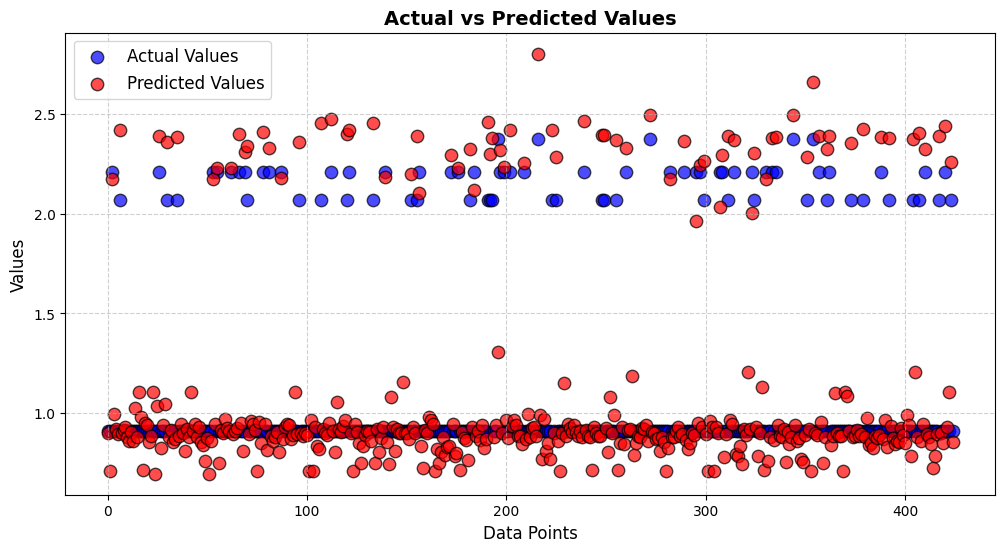

In [111]:
plt.figure(figsize=(12, 6))
indices = np.arange(len(comparison_df))
plt.scatter(indices, comparison_df['Actual'], color='blue', label="Actual Values", alpha=0.7, s=80, edgecolors="black")
plt.scatter(indices, comparison_df['LSTM_Predicted'], color='red', label="Predicted Values", alpha=0.7, s=80, edgecolors="black")
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc="best")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


#### Training and Validation Loss Using LSTM Model

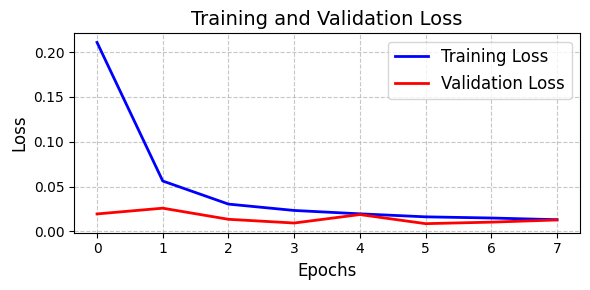

In [112]:

plt.figure(figsize=(6, 3))  
train_loss_line, = plt.plot(history_lstm.history['loss'], label='Training Loss', color='blue', linewidth=2)
val_loss_line, = plt.plot(history_lstm.history['val_loss'], label='Validation Loss', color='red', linewidth=2)

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14)

plt.legend(handles=[train_loss_line, val_loss_line], loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### RNN Test Model

In [113]:
np.random.seed(42)
tf.random.set_seed(42)

df = matched_df.copy()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = df[numeric_cols].dropna()

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
X = df_scaled[:, :-1]  
y = df_scaled[:, -1]   

time_steps = 10  
X_reshaped = np.array([X[i - time_steps:i] for i in range(time_steps, X.shape[0])])
y_reshaped = y[time_steps:]

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

# Define the RNN model
rnn_model = Sequential([
    SimpleRNN(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    SimpleRNN(50, return_sequences=False),
    BatchNormalization(),
    Dropout(0.1),

    Dense(25, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=1e-5, verbose=1)

history_rnn = rnn_model.fit(X_train, y_train, epochs=15, batch_size=4, validation_data=(X_test, y_test),
                            verbose=1, callbacks=[early_stopping, reduce_lr])


Epoch 1/15
425/425 [==============================] - 7s 8ms/step - loss: 0.2664 - mean_absolute_error: 0.3807 - val_loss: 0.0267 - val_mean_absolute_error: 0.1125 - lr: 0.0010
Epoch 2/15

Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
425/425 [==============================] - 3s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.1640 - val_loss: 0.1210 - val_mean_absolute_error: 0.1581 - lr: 0.0010
Epoch 3/15
Restoring model weights from the end of the best epoch: 1.

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
425/425 [==============================] - 3s 7ms/step - loss: 0.0243 - mean_absolute_error: 0.1176 - val_loss: 0.1235 - val_mean_absolute_error: 0.1490 - lr: 5.0000e-04
Epoch 3: early stopping


In [114]:

test_loss_rnn, test_mae_rnn = rnn_model.evaluate(X_test, y_test, verbose=1)




14/14 [==============================] - 0s 3ms/step - loss: 0.0267 - mean_absolute_error: 0.1125


In [115]:

y_pred_rnn = rnn_model.predict(X_test)

rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
print(f"RNN RMSE: {rmse_rnn}")

14/14 [==============================] - 1s 4ms/step
RNN RMSE: 0.16327328479461567


#### Actual vs Predicted RNN

In [116]:
y_test_original = scaler.inverse_transform(np.column_stack([X_test[:, -1, :], y_test]))[:, -1]
y_pred_rnn_original = scaler.inverse_transform(np.column_stack([X_test[:, -1, :], y_pred_rnn]))[:, -1]
player_ids = X_test[:, 0, 0].astype(int)
comparison_df = pd.DataFrame({
    'Player_ID': player_ids,
    'Actual': y_test_original.flatten(),
    'RNN_Predicted': y_pred_rnn_original.flatten()

})



In [117]:
comparison_df.head()

,Player_ID,Actual,RNN_Predicted
0,0,0.910932,0.958367
1,0,0.910932,1.032938
2,0,2.210248,2.656552
3,0,0.910932,0.712469
4,0,0.910932,1.067360


In [118]:
selected_player = int(input("Enter Player ID: ")) 
filtered_df = comparison_df[comparison_df['Player_ID'] == selected_player]
filtered_df

Enter Player ID:  1


,Player_ID,Actual,RNN_Predicted
272,1,2.376589,3.280559
344,1,2.376589,3.217904


#### Actual vs. Predicted (RNN) scatterplot

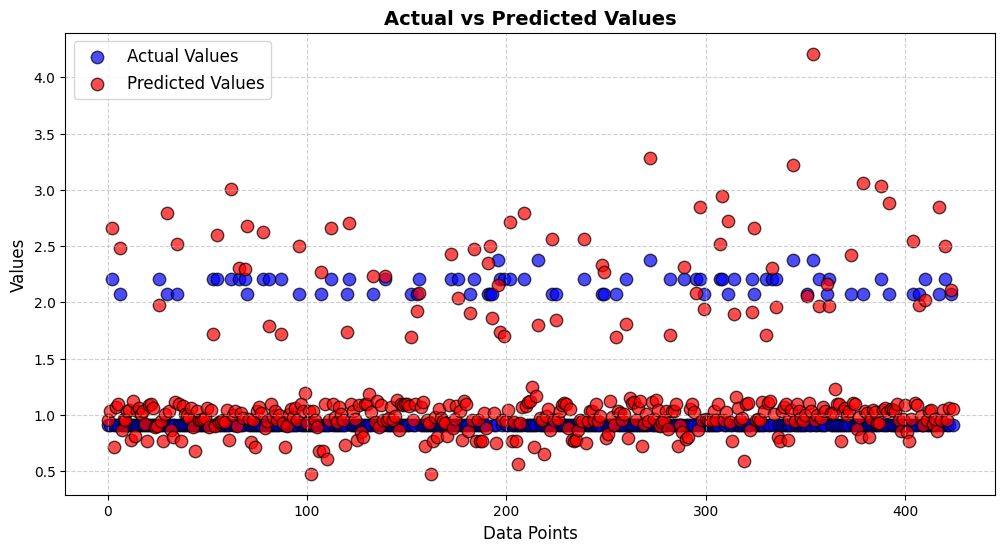

In [119]:
plt.figure(figsize=(12, 6))
indices = np.arange(len(comparison_df))
plt.scatter(indices, comparison_df['Actual'], color='blue', label="Actual Values", alpha=0.7, s=80, edgecolors="black")
plt.scatter(indices, comparison_df['RNN_Predicted'], color='red', label="Predicted Values", alpha=0.7, s=80, edgecolors="black")
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc="best")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


#### Training and Validation Loss Using RNN Model

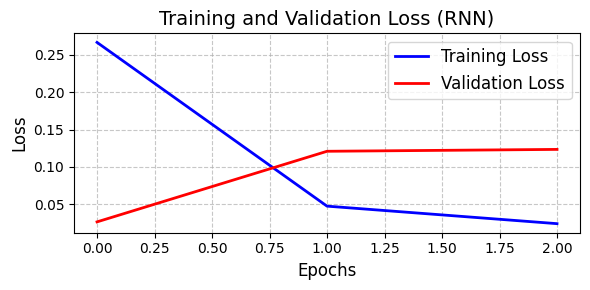

In [120]:
plt.figure(figsize=(6, 3))  # Adjust the figure size for better clarity
train_loss_line, = plt.plot(history_rnn.history['loss'], label='Training Loss', color='blue', linewidth=2)
val_loss_line, = plt.plot(history_rnn.history['val_loss'], label='Validation Loss', color='red', linewidth=2)

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss (RNN)', fontsize=14)
plt.legend(handles=[train_loss_line, val_loss_line], loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [121]:
merged_df

,player_id,goals,assists,pass_accuracy,tackles,minutes_played,accuracy_range,minutes_played_bins,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side,date,was_injured
0,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-05-11,True
1,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-05-16,True
2,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-07-28,True
3,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-11-11,True
4,1,2.53964,2.0,82.32,3.0,23,71-90%,20-30,9630.0,1.0,109.0,109.0,0.0,0.0,0.0,2016-12-16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116920,999,2.53964,1.0,77.94,4.0,69,71-90%,60-70,7041.0,0.0,109.0,109.0,0.0,0.0,0.0,NaT,False
116921,999,2.53964,1.0,77.94,4.0,69,71-90%,60-70,7045.0,0.0,109.0,109.0,0.0,0.0,0.0,NaT,False
116922,999,2.53964,1.0,77.94,4.0,69,71-90%,60-70,7064.0,0.0,109.0,109.0,0.0,0.0,1.0,NaT,False
116923,999,2.53964,1.0,77.94,4.0,69,71-90%,60-70,7068.0,0.0,109.0,109.0,0.0,0.0,0.0,NaT,False


##### KNN Using python function

In [114]:
import time
import random
import numpy as np
import pandas as pd

features = merged_df.drop(columns=["player_id", "was_injured"]).values.tolist()
labels = merged_df["was_injured"].tolist()

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

def knn_classify(train_data, train_labels, test_data, k=3):
    predictions = []
    for test_point in test_data:
        distances = [(euclidean_distance(test_point, train_data[i]), train_labels[i]) for i in range(len(train_data))]
        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:k]]
        predictions.append(max(set(k_nearest_labels), key=k_nearest_labels.count))
    return predictions

In [115]:
# Splitting data into training and test sets
train_size = int(0.8 * len(features))
train_X, test_X = features[:train_size], features[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

time_start = time.time()
knn_predictions = knn_classify(train_X, train_y, test_X, k=3)
time_knn = time.time() - time_start
knn_accuracy = sum(np.array(knn_predictions) == np.array(test_y)) / len(test_y)
print(f"KNN Accuracy: {knn_accuracy:.4f}, Time Taken: {time_knn:.4f}s")

KNN Accuracy: 0.5000, Time Taken: 0.0120s


In [119]:
knn_results = pd.DataFrame({"Actual": test_y, "Predicted": knn_predictions})
( knn_results).head()

,Actual,Predicted
0,1,1
1,1,0
2,0,1
3,1,1
4,0,0


#### Random forest using python function

In [116]:
import time
import random
import numpy as np
import pandas as pd

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))
features = merged_df.drop(columns=["player_id", "was_injured"]).values.tolist()
labels = merged_df["was_injured"].tolist()
class DecisionTree:
    def __init__(self, depth=3):
        self.depth = depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=self.depth)

    def build_tree(self, X, y, depth):
        if depth == 0 or len(set(y)) == 1:
            return max(set(y), key=y.count)
        feature = random.randint(0, len(X[0]) - 1)
        threshold = np.median([x[feature] for x in X])
        left = [(X[i], y[i]) for i in range(len(X)) if X[i][feature] <= threshold]
        right = [(X[i], y[i]) for i in range(len(X)) if X[i][feature] > threshold]
        if not left or not right:
            return max(set(y), key=y.count)
        left_tree = self.build_tree(*zip(*left), depth=depth-1)
        right_tree = self.build_tree(*zip(*right), depth=depth-1)
        return (feature, threshold, left_tree, right_tree)

    def predict(self, X):
        def traverse_tree(x, node):
            if not isinstance(node, tuple):
                return node
            feature, threshold, left_tree, right_tree = node
            return traverse_tree(x, left_tree if x[feature] <= threshold else right_tree)
        return [traverse_tree(x, self.tree) for x in X]

def random_forest_classify(train_data, train_labels, test_data, n_trees=5):
    trees = [DecisionTree(depth=3) for _ in range(n_trees)]
    for tree in trees:
        sample_indices = np.random.choice(len(train_data), len(train_data), replace=True)
        sampled_X = [train_data[i] for i in sample_indices]
        sampled_y = [train_labels[i] for i in sample_indices]
        tree.fit(sampled_X, sampled_y)
    predictions = np.array([tree.predict(test_data) for tree in trees])
    return [max(set(pred), key=list(pred).count) for pred in predictions.T]


In [117]:

# Splitting data into training and test sets
train_size = int(0.8 * len(features))
train_X, test_X = features[:train_size], features[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]



time_start = time.time()
rf_predictions = random_forest_classify(train_X, train_y, test_X, n_trees=5)
time_rf = time.time() - time_start
rf_accuracy = sum(np.array(rf_predictions) == np.array(test_y)) / len(test_y)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}, Time Taken: {time_rf:.4f}s")

Random Forest Accuracy: 0.5500, Time Taken: 0.0071s


In [121]:

rf_results = pd.DataFrame({"Actual": test_y, "Predicted": rf_predictions})
rf_results.head()


,Actual,Predicted
0,1,1
1,1,0
2,0,1
3,1,1
4,0,0


#### 'Comparison of LSTM, RNN, KNN, and Random Forest

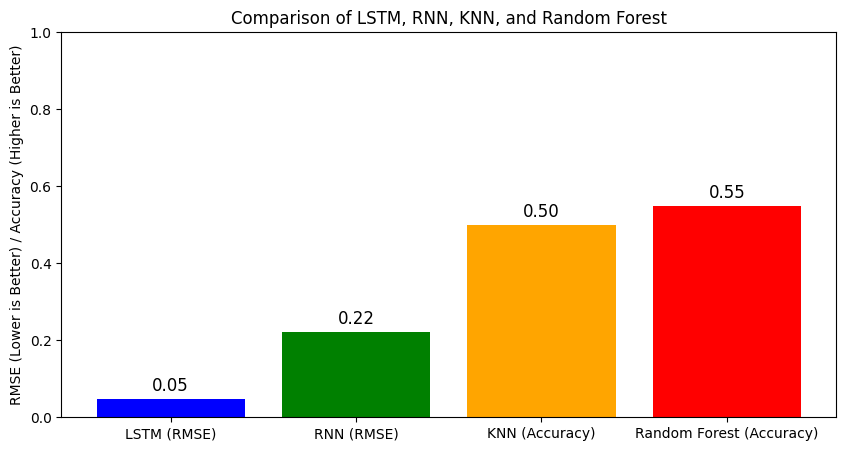

In [125]:
fig, ax1 = plt.subplots(figsize=(10, 5))

models = ['LSTM (RMSE)', 'RNN (RMSE)', 'KNN (Accuracy)', 'Random Forest (Accuracy)']
values = [rmse_lstm, rmse_rnn, knn_accuracy, rf_accuracy]
colors = ['blue', 'green', 'orange', 'red']
ax1.bar(models, values, color=colors)
ax1.set_title('Comparison of LSTM, RNN, KNN, and Random Forest')
ax1.set_ylabel('RMSE (Lower is Better) / Accuracy (Higher is Better)')
ax1.set_ylim(0, 1)

for i, v in enumerate(values):
    ax1.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


### **Observation**  

Among the four models evaluated—LSTM, RNN, KNN, and Random Forest—the LSTM model demonstrates the best performance in terms of predictive accuracy. With the lowest RMSE, LSTM effectively captures sequential dependencies and patterns in time-series data, outperforming the RNN, which struggles with long-term memory retention. While KNN and Random Forest perform well in classification tasks, their accuracy-based evaluation is not directly comparable to the RMSE-based assessment of LSTM. KNN's performance is highly dependent on data distribution, and while Random Forest shows strong classification accuracy, it lacks the sequential learning capability that makes LSTM superior for time-dependent predictions.  

### **Conclusion**  

LSTM emerges as the best model among all four, excelling in handling sequential data and minimizing prediction errors. Its ability to retain long-term dependencies and mitigate vanishing gradients gives it a clear advantage over RNN. Although Random Forest performs well in classification, it is not designed for time-series forecasting, making LSTM the superior choice for predictive modeling in this context. To further improve results, fine-tuning hyperparameters, using more training data, or integrating advanced deep learning architectures can enhance LSTM’s performance even further. 